In [1]:
%matplotlib inline
import os
import matplotlib
import matplotlib as mpl
from scipy import stats
import numpy as np
import pandas as pd
# !pip install cometml_api
from cometml_api import api
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()
sns.set_palette("colorblind")
sns.set_style("whitegrid")
sns.set()
sns.set(font_scale=1.5)
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

In [2]:
trhic = 'f5ffcac825df402c991de3e3f1d5b676'
trhic2 = '5f73e98e01bd406696f4c6938360914b'
trhic3 ='fa53a63863c54742b1b0b4781cf3a2cb'
trhick = '00da10d890544e0ab9772815cd2ac5cc'
trhic_3inv = '80413958ea574d8b9f7587270dd33695'
trhic_gauss = '503a6fe20dd54c35897f23c2a9de21bb'
trhic4dataset = '9b404f6fe26d48babe789e03105b87a3'

trhic_complexity = '6e413a450bd44eaea8ecb283efae2d14'
trhic_complexity_reg = 'da6d8235518f4c1b83c3afcf5c39104b'
trhic_complexity_rankk = '6ae9f2b28e8c41428c04cdb0a8fca8bc'
trhic_complexity_activation = '6bdb214976c44679b0170541a02b0393'
trhic_complexity_size = 'fd460619651646a0a9effef1e51a668c'
trhic_measures = '8b02110c74fb48a3b1108036f7b930fa'


trhic_mlp_size = 'f09f9b0af73647248ea8747e07aa1d6a'
trhic_mlp_corrupt = '10725575f6fd47d5bf0ef3c89f03d708'

# xname = 'hidden_size'
xname = 'corrupt'

if xname == 'corrupt':
    experiment_id = trhic_mlp_corrupt
else:
    experiment_id = trhic_mlp_size


In [3]:
os.makedirs("plots/", exist_ok=True)
#experiment = Experiment(api_key='98Hhyb58cThYVpxaOvbL3Yu8S', project_name='trhic', workspace='valthom')
experiments = api.get_experiments(experiment_id)
metric_names = api.get_metrics(experiments[0]["experiment_key"]).keys()

# metricsx = []
# metricsy = []
# #metric_namex = 'trace/H1Ctr'
# metric_namex = 'trace/H1Cte'
# metric_namey = 'loss/gap'


In [4]:
api.get_params(experiments[0]["experiment_key"])['hidden_size']

'70'

In [5]:
def make_df(metric, param, exp):
    
    df = pd.DataFrame({})
    try:
        for name in metric.keys():
            df[name] = metric[name]['value']
            df['step'] = metric[name]['step']
        for name in param.keys():
            df[name] = param[name]
    #     from IPython.core.debugger import Tracer; Tracer()()

            df['hidden_size'] = float(param['hidden_size'])

        df['model'] = param['model']
        df['ratio_lr_bs'] = float(param['lr'])/float(param['batch_size'])
        df['ratio_bs_ds'] = float(param['batch_size'])/float(param['dataset_size'])
        df['lr'] = float(param['lr'])
        df['batch_size'] = float(param['batch_size'])
        df['dataset_size'] = float(param['dataset_size'])
        df['rcond'] = float(param['rcond'])
        df['corrupt'] = float(param['corrupt'])
    except:
        return df
    return df


In [6]:
# df = make_df(metric, param)
all_df = [make_df(api.get_metrics(experiments[i]["experiment_key"]), api.get_params(experiments[i]["experiment_key"]), exp) for i, exp in enumerate(experiments)]

In [7]:
df = pd.concat(all_df)
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set_style("whitegrid")

In [8]:
df.keys()

Index(['sim_frob/Fte_Ftr', 'step', 'measures/L1max_L1max',
       'measures/Spec_L1 bound', 'measures/Spec_Fro bound', 'err/te',
       'loss/gap', 'measures/sensitivity/tr', 'trace/FFte',
       'measures/L1max_Spec', 'trace/HCte', 'measures/Frobenius2',
       'measures/Frobenius1', 'sim_frob/Fte_Hte', 'measures/Spec_Dist',
       'measures/sensitivity/te', 'measures/init_Fro', 'unsim_L2/Htr_Hte',
       'trace/HHtr', 'measures/Dist_Fro_sum', 'trace/Ctr', 'sim_frob/Cte_Ctr',
       'sim_frob/Ftr_Htr', 'trace/Cte', 'unsim_L2/Ctr_Cte',
       'measures/fisher_rao/te', 'measures/fisher_rao/tr', 'sim_frob/Hte_Htr',
       'sim_frob/Ctr_Htr', 'err/tr', 'unsim_L2/Fte_Hte', 'measures/Dist_Spec',
       'unsim_L2/Cte_Fte', 'trace/H1Ctr', 'unsim_L2/Cte_Hte', 'trace/CCtr',
       'measures/VC bound', 'ratio/trace_HC_o_HHtr', 'sim_frob/Ctr_Ftr',
       'loss/te', 'unsim_L2/Ftr_Htr', 'trace/F1Cte', 'trace/H1Cte',
       'measures/l2_norm', 'trace/HHte', 'ratio/trace_HC_o_HHte',
       'unsim_L2/

In [9]:
# df['ratio/trace_HH_o_HCte'] = df['trace/HHte']/df['trace/HCte']
# df['ratio/trace_HH_o_HCtr'] = df['trace/HHtr']/df['trace/HCtr']
# df['ratio/trace_HC_o_HHte'] = df['trace/HCte']/df['trace/HHte']
# df['ratio/trace_HC_o_HHtr'] = df['trace/HCtr']/df['trace/HHtr']
# df['ratio/norm_C_o_Hte'] = np.sqrt(df['trace/CCte']/df['trace/HHte'])
# df['ratio/norm_C_o_Htr'] = np.sqrt(df['trace/CCtr']/df['trace/HHtr'])
df['unsim_frob/Cte_Hte'] = 1- df['sim_frob/Cte_Hte']
df['unsim_frob/Ctr_Htr'] = 1- df['sim_frob/Ctr_Htr']
df['unsim_frob/Ctr_Htr'] = 1- df['sim_frob/Ctr_Htr']
df['unsim_frob/Ftr_Htr'] = 1- df['sim_frob/Ftr_Htr']


df['C/H_tr'] = df['sim_frob/Ctr_Htr']*df['trace/Ctr']/df['trace/Htr']
df['C/H_te'] = df['sim_frob/Cte_Hte']*df['trace/Cte']/df['trace/Hte']

df['loss/abs_gap'] = np.abs(df['loss/gap'])

df['aic'] = (df['hidden_size']*60)/5000
df['measures/sensitivity_sqrt/te'] = np.sqrt(df['measures/sensitivity/te'])
df['measures/sensitivity_sqrt/tr'] = np.sqrt(df['measures/sensitivity/tr'])

df['measures/aic'] = df['measures/#parameter']/df['dataset_size']
# df['loss/te_est'] = df['loss/tr'] + df['trace/H1Cte']

# df['ratio/norm_Ftr_Htr'] = df['trace/HHtr'] /df['trace/FFtr'] 

In [10]:
np.unique(np.array(df['step']))

array([     0,  25000,  50000,  75000, 100000, 125000, 150000])

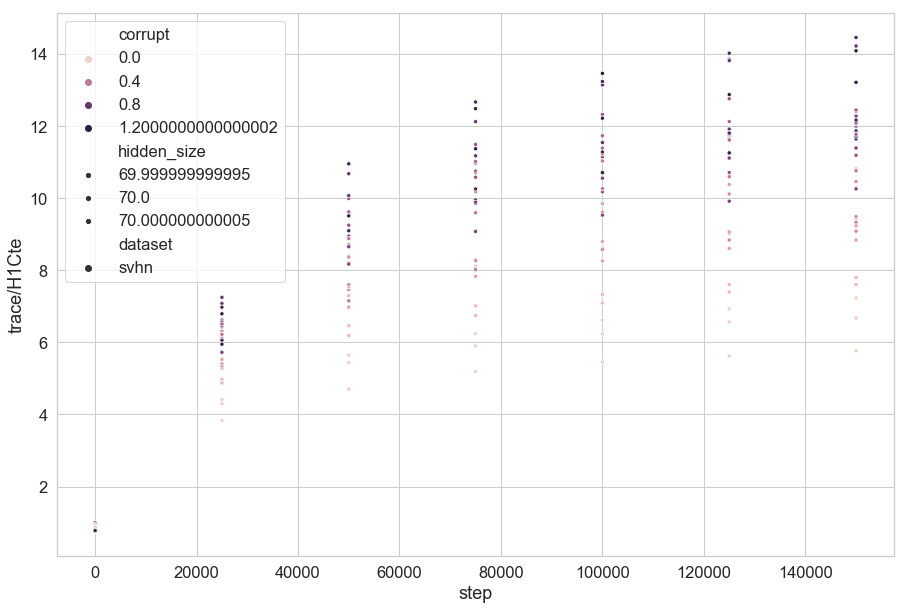

In [11]:
ax = sns.scatterplot(data=df.loc[(df['dataset'] == 'svhn')], y='trace/H1Cte', x='step', style='dataset', size='hidden_size', hue='corrupt')

In [12]:
time = 75000*0
time = 25000*6
filtr = (df['step']==time) & (df['rcond'] == 1e-4) & (df['dataset'] == 'svhn') #& (df['corrupt'] == 0)

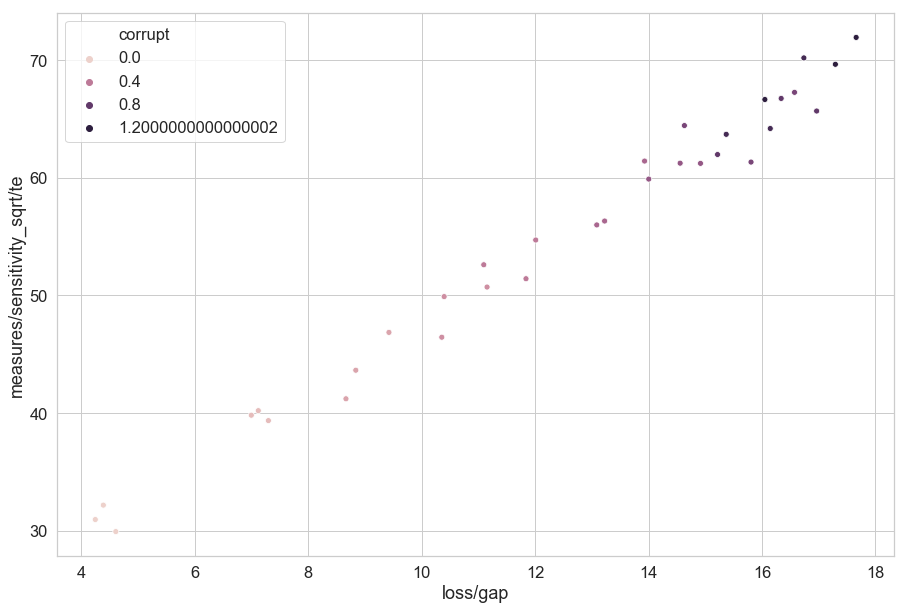

In [13]:
ax = sns.scatterplot(data=df.loc[filtr], y='measures/sensitivity_sqrt/te', x='loss/gap', hue=xname)

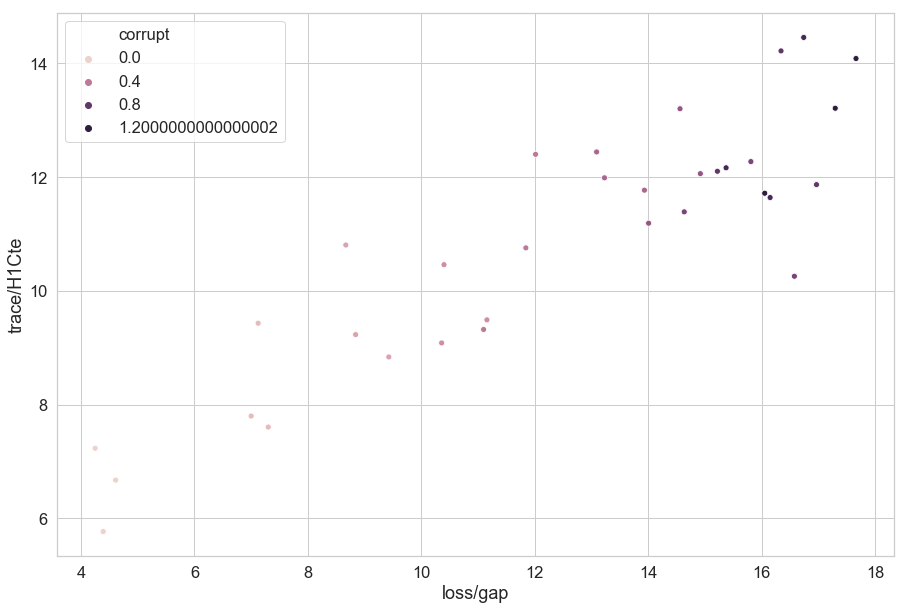

In [14]:
ax = sns.scatterplot(data=df.loc[filtr], y='trace/H1Cte', x='loss/gap', hue=xname)
# plt.yscale('symlog')

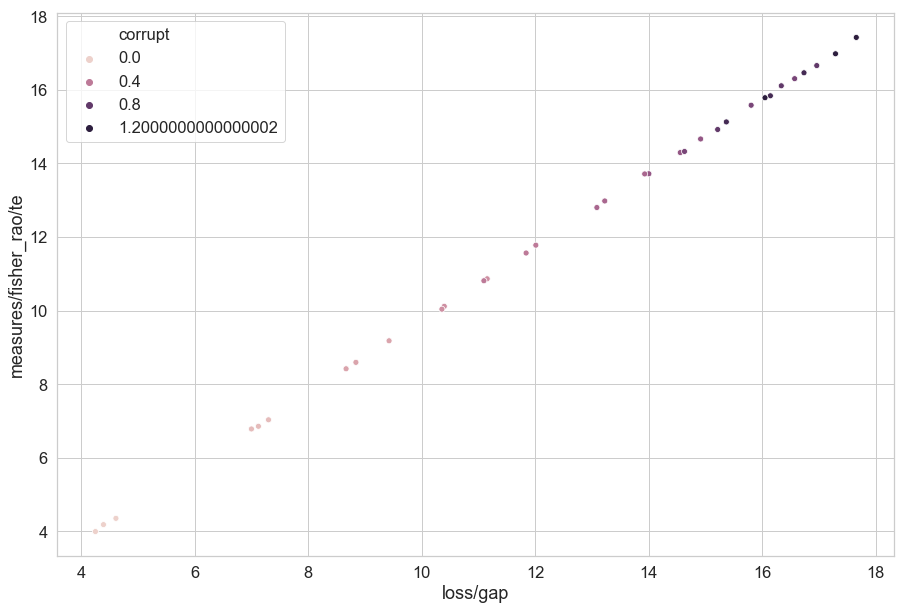

In [15]:
ax = sns.scatterplot(data=df.loc[filtr], y='measures/fisher_rao/te', x='loss/gap', hue=xname)

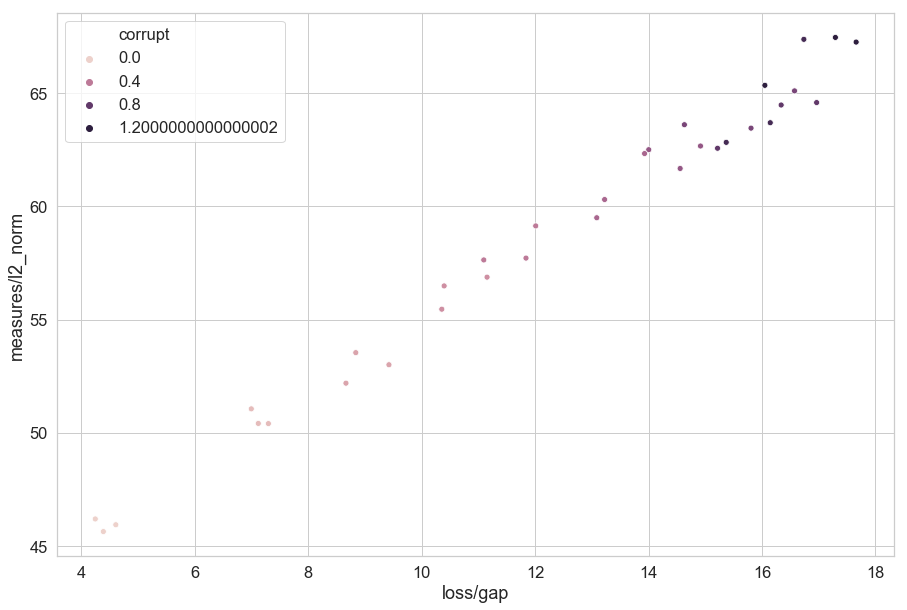

In [16]:
ax = sns.scatterplot(data=df.loc[filtr], y='measures/l2_norm', x='loss/gap', hue=xname)

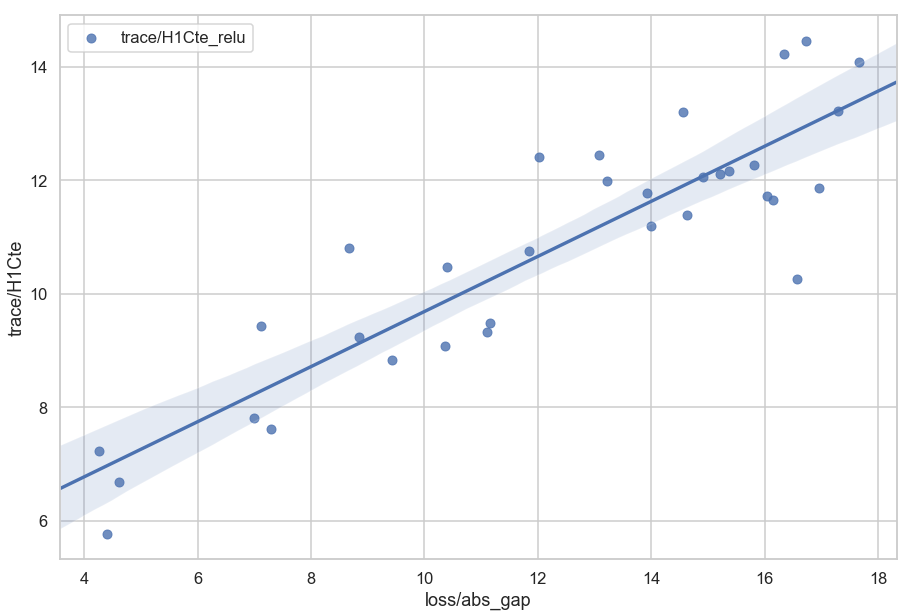

In [17]:
sns.set(style="whitegrid", rc={"lines.linewidth": 1.5})
sns.set_context("talk")
# sns.scatterplot(data=df.loc[(df['dataset'] == 'svhn')], x='dataset_size', y='trace/H1Cte', hue='dataset', style='model')
for name in df.keys():
    if 'H1Cte' in name:
        ax = sns.regplot(data=df.loc[filtr & (df['activation'] == 'relu')], y=name, x='loss/abs_gap', label=name+'_relu')
#         ax = sns.regplot(data=df.loc[filtr & (df['activation'] == 'tanh')], y=name, x='loss/abs_gap', label=name+'_tanh')
plt.legend()
# plt.yscale('log')
# plt.xscale('log')

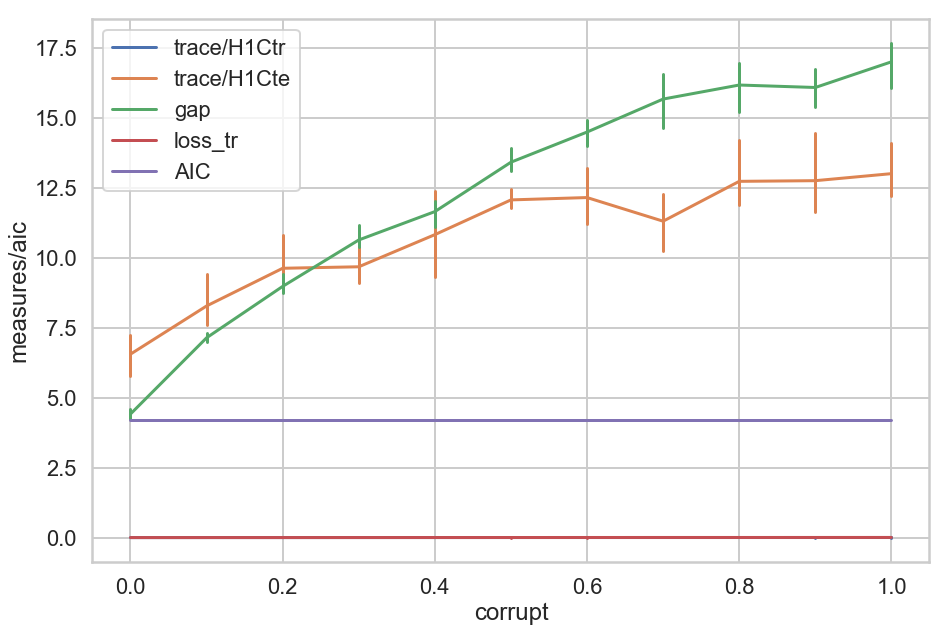

In [18]:
sns.set(style="whitegrid", rc={"lines.linewidth": 1.5})
sns.set_context("poster")


activation = 'relu'
filtr_act = (df['activation'] == activation)



for name in df.keys():
    if 'H1Ct' in name:
        ax = sns.lineplot(data=df.loc[filtr], y=name, x=xname, label=f'{name}', err_style='bars')

sns.lineplot(data=df.loc[filtr & filtr_act], x=xname, y='loss/gap', label=f'gap', 
             err_style="bars")

sns.lineplot(data=df.loc[filtr & filtr_act], x=xname, y='loss/tr', label=f'loss_tr', 
             err_style="bars")
# sns.lineplot(data=df.loc[filtr & filtr_act], x='hidden_size', y='loss/te', label=f'loss_te_{activation}', 
#              err_style="bars")


sns.lineplot(data=df.loc[filtr], y='measures/aic', x=xname, label=f'AIC', err_style='bars')

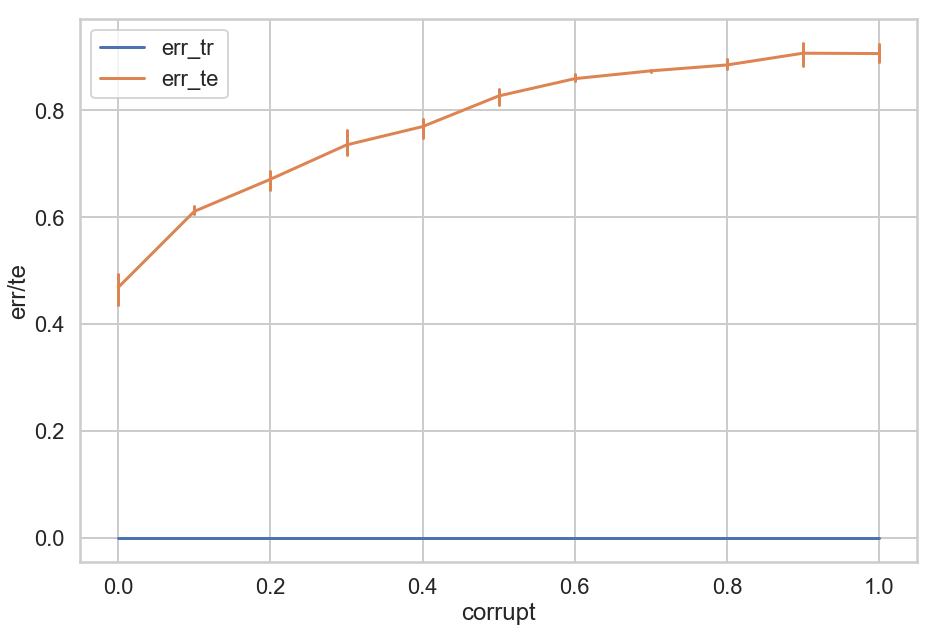

In [19]:
# ax = sns.lineplot(data=df.loc[filtr], x='hidden_size', y='loss/tr', label=f'loss_tr', 
#              err_style="bars")
# sns.lineplot(data=df.loc[filtr], x='hidden_size', y='loss/te', label=f'loss_te', 
#              err_style="bars")
# ax2 = ax.twinx()
sns.lineplot(data=df.loc[filtr], x=xname, y='err/tr', label=f'err_tr', 
             err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='err/te', label=f'err_te', 
             err_style="bars")

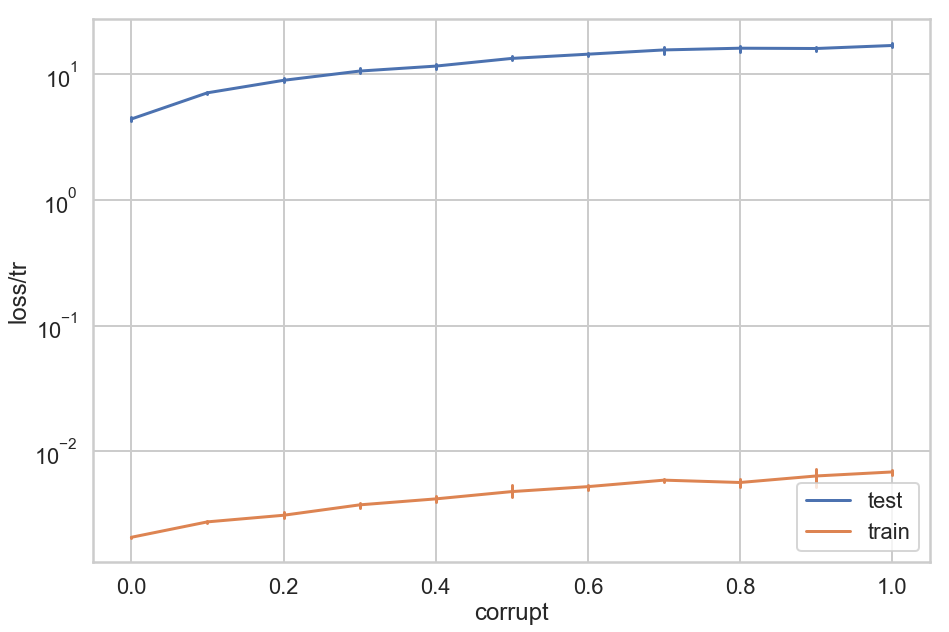

In [20]:
sns.lineplot(data=df.loc[filtr], x=xname, y='loss/te', label='test',  err_style="bars")
# sns.lineplot(data=df.loc[filtr], x='hidden_size', y='loss/te_est', label='test_estim',  err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='loss/tr', label='train',  err_style="bars")
plt.yscale('log')

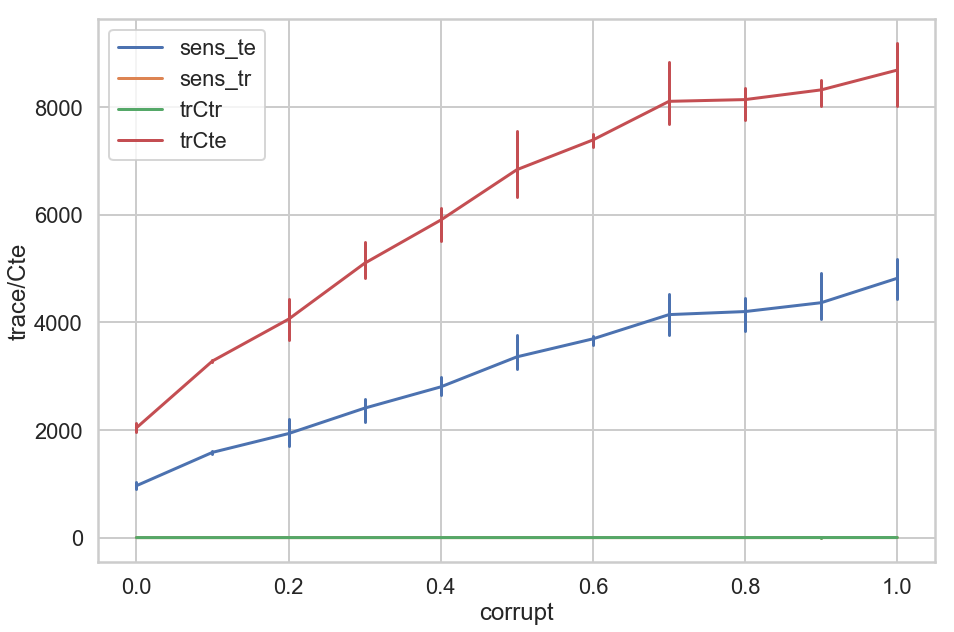

In [21]:
sns.lineplot(data=df.loc[filtr], x=xname, y='measures/sensitivity/te', label='sens_te', err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='measures/sensitivity/tr', label='sens_tr', err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='trace/Ctr', label='trCtr', err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='trace/Cte', label='trCte', err_style="bars")

# plt.yscale('log')

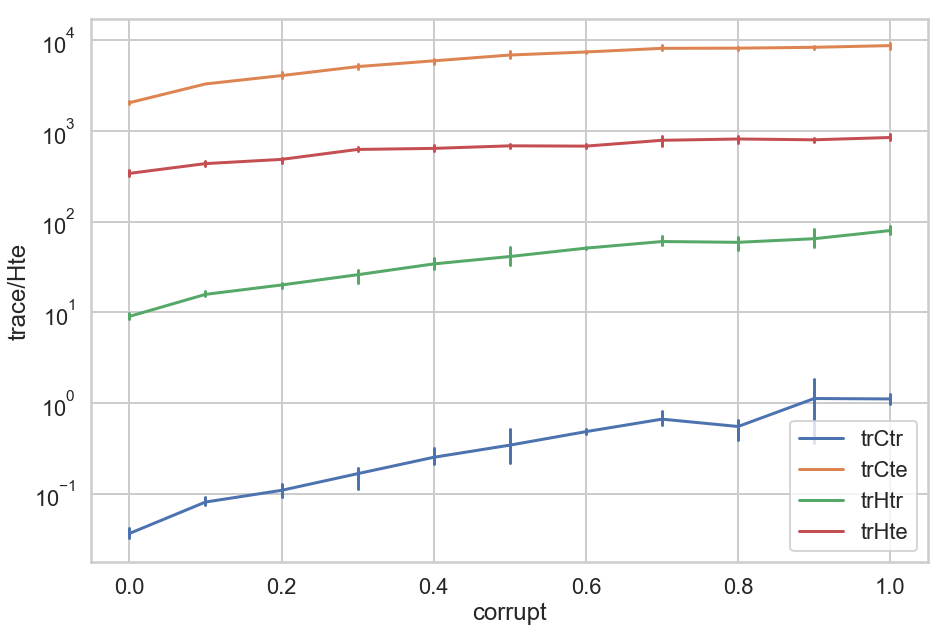

In [22]:
sns.lineplot(data=df.loc[filtr], x=xname, y='trace/Ctr', label='trCtr', err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='trace/Cte', label='trCte', err_style="bars")

sns.lineplot(data=df.loc[filtr], x=xname, y='trace/Htr', label='trHtr', err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='trace/Hte', label='trHte', err_style="bars")
plt.yscale('log')

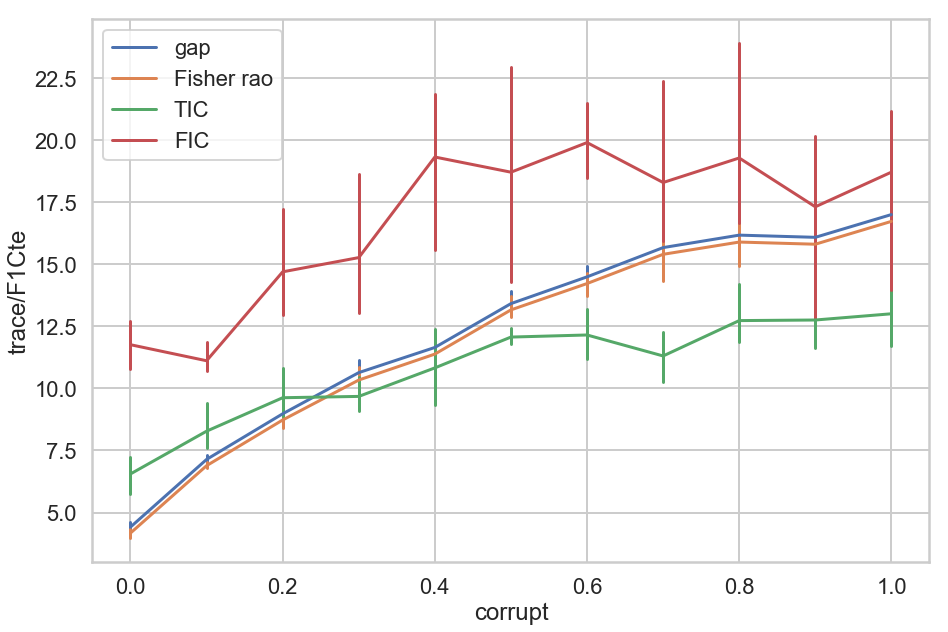

In [56]:
# df['scaled_trace/Cte'] = df['trace/Cte']/600
# sns.lineplot(data=df.loc[filtr], x='hidden_size', y='scaled_trace/Cte', label='trCte', err_style="bars")
# sns.lineplot(data=df.loc[filtr], x='hidden_size', y='ratio/trace_C_o_Hte', label='ratio', err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='loss/abs_gap', label='gap', err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='measures/fisher_rao/te', label='Fisher rao', err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='trace/H1Cte', label='TIC', err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='trace/F1Cte', label='FIC', err_style="bars")
# sns.lineplot(data=df.loc[filtr], x='hidden_size', y='fisher_rao/te', label='gap', err_style="bars")

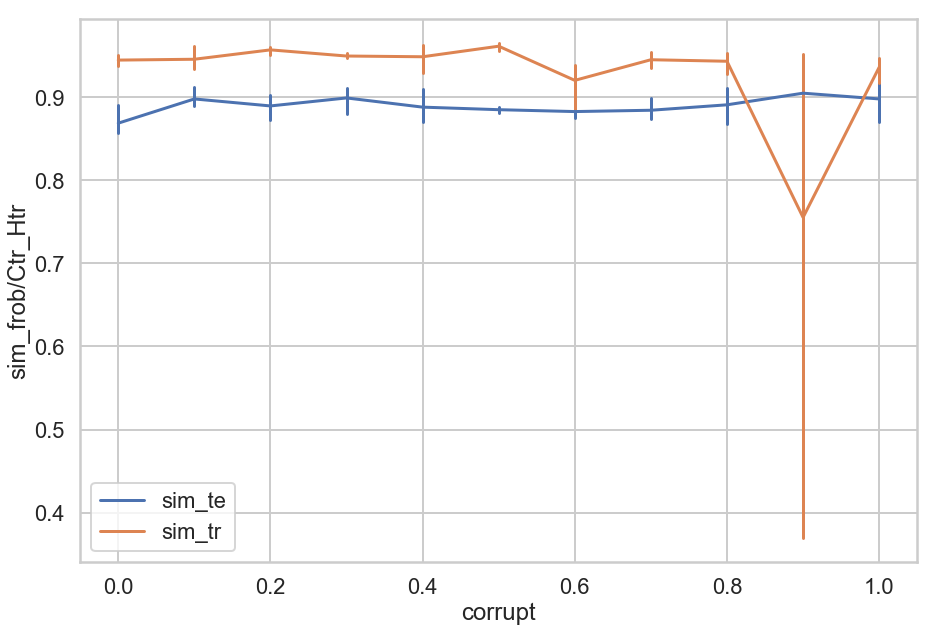

In [24]:

sns.lineplot(data=df.loc[filtr], x=xname, y='sim_frob/Cte_Hte', label='sim_te', err_style="bars")
# sns.lineplot(data=df.loc[filtr], x='hidden_size', y='ratio/trace_C_o_Hte', label='ratio', err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='sim_frob/Ctr_Htr', label='sim_tr', err_style="bars")

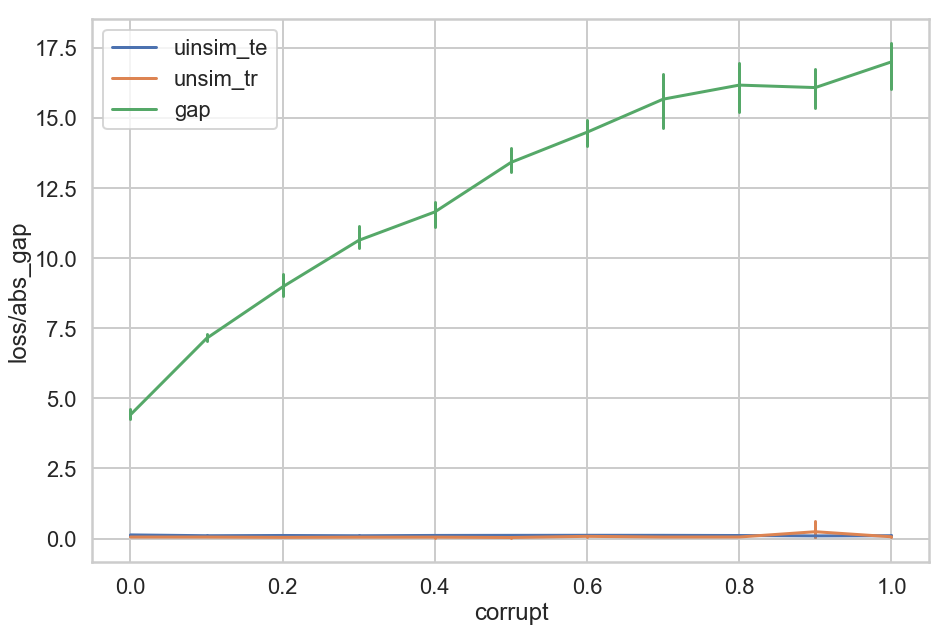

In [25]:

sns.lineplot(data=df.loc[filtr], x=xname, y='unsim_frob/Cte_Hte', label='uinsim_te', err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='unsim_frob/Ctr_Htr', label='unsim_tr', err_style="bars")

sns.lineplot(data=df.loc[filtr], x=xname, y='loss/abs_gap', label='gap', err_style="bars")

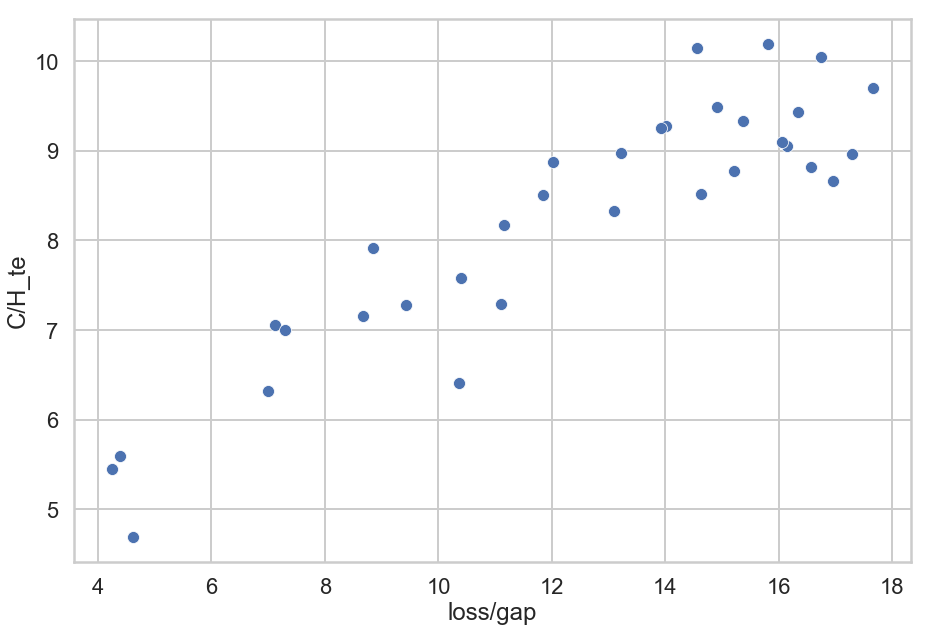

In [26]:
sns.scatterplot(data=df.loc[filtr], x='loss/gap', y='C/H_te')

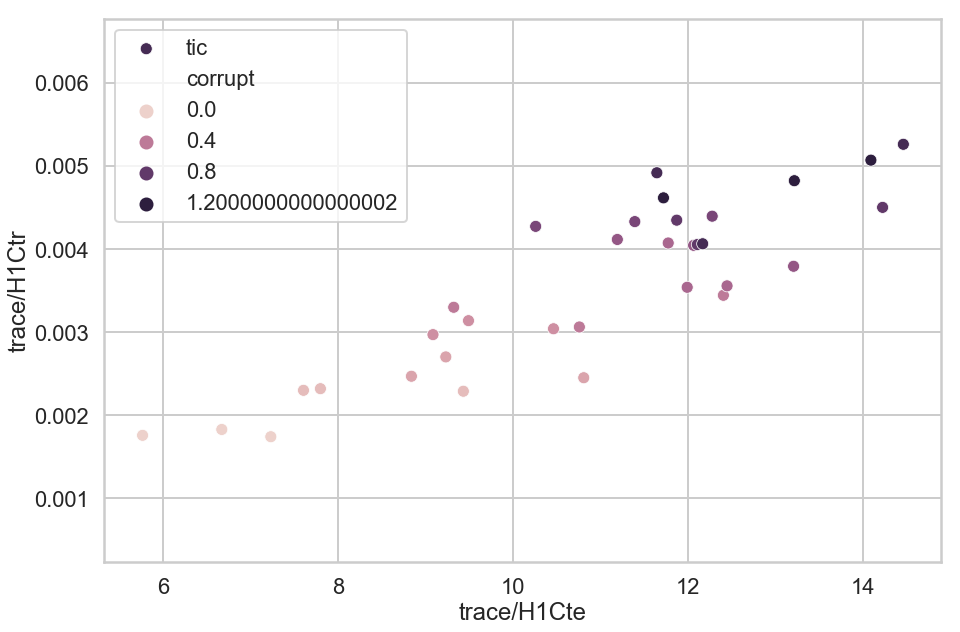

In [27]:
# sns.lineplot(data=df.loc[filtr], x='trace/H1Cte', y='trace/H1Ctr', label='tic', err_style="bars")
sns.scatterplot(data=df.loc[filtr], x='trace/H1Cte', y='trace/H1Ctr', label='tic', hue=xname)
# sns.scatterplot(data=df.loc[filtr], x='loss/abs_gap', y='trace/H1Ctr', label='gpa', hue='hidden_size')
# sns.lineplot(data=df.loc[filtr], x='hidden_size', y='C/H_tr', label='sim_tr', err_style="bars")
# sns.lineplot(data=df.loc[filtr], x='hidden_size', y='loss/abs_gap', label='gap', err_style="bars")



In [28]:
meas_list = []
for k in df.keys():
    if 'measure' in k:
        meas_list.append(k)
        

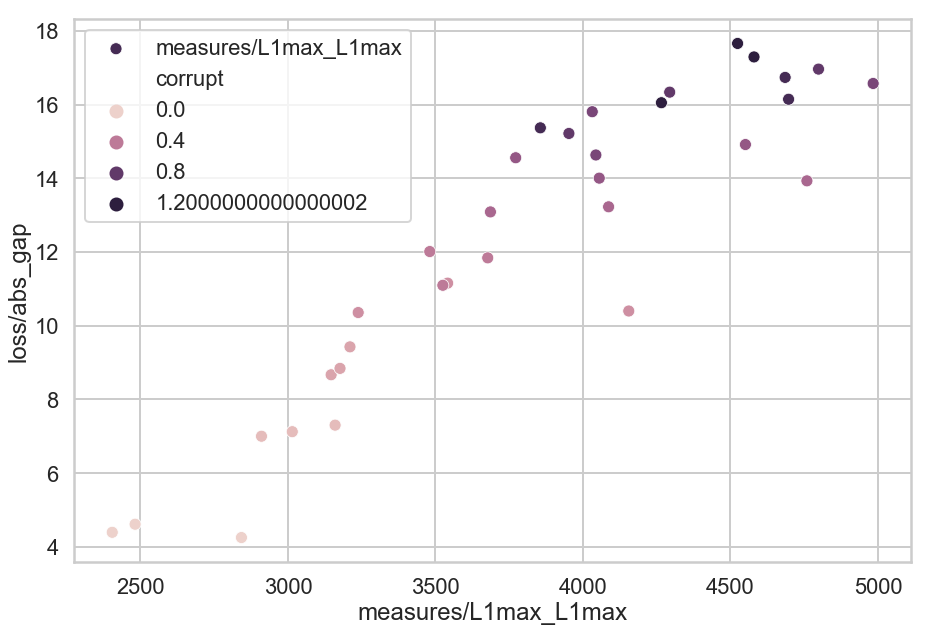

In [29]:
i=0
sns.scatterplot(data=df.loc[filtr], y='loss/abs_gap', x=meas_list[i], label=meas_list[i], hue=xname)
# plt.xscale('log')
# plt.yscale('log')

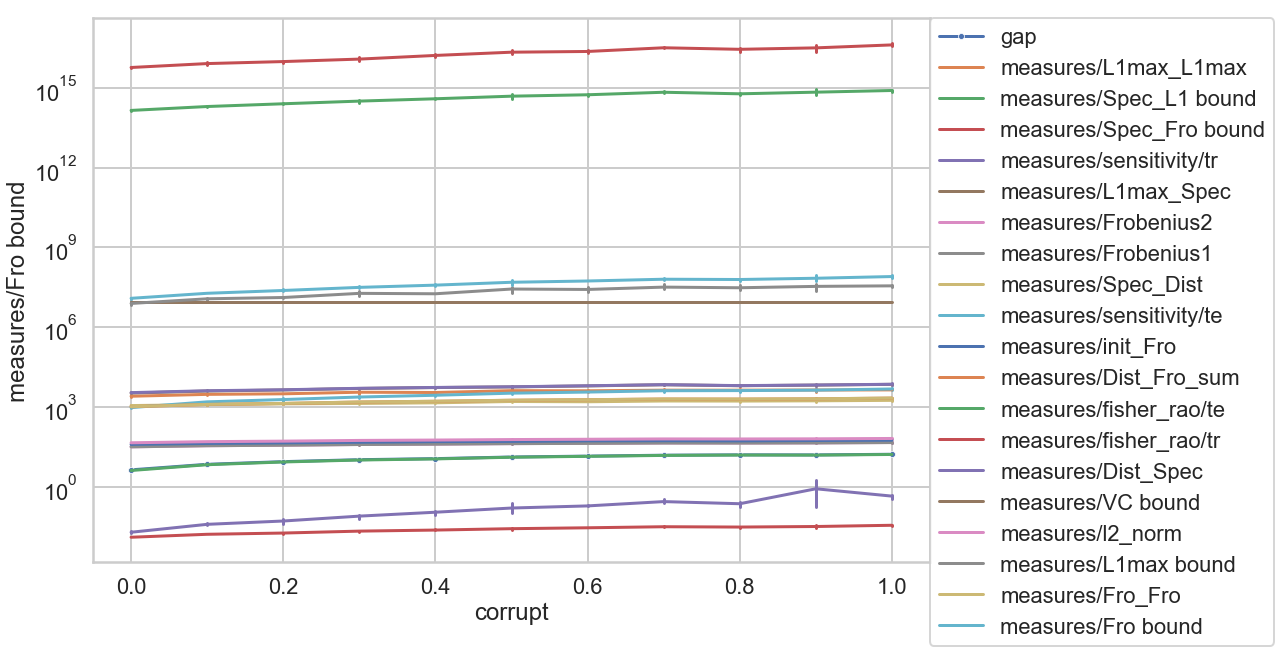

In [30]:
sns.lineplot(data=df.loc[filtr], x=xname, y='loss/abs_gap', label='gap', err_style="bars", marker='.')
for i in range(19):
    sns.lineplot(data=df.loc[filtr], x=xname, y=meas_list[i], label=meas_list[i], err_style="bars")
# sns.lineplot(data=df.loc[filtr], x='hidden_size', y='ratio/trace_C_o_Hte', label='ratio', err_style="bars")

plt.yscale('log')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)

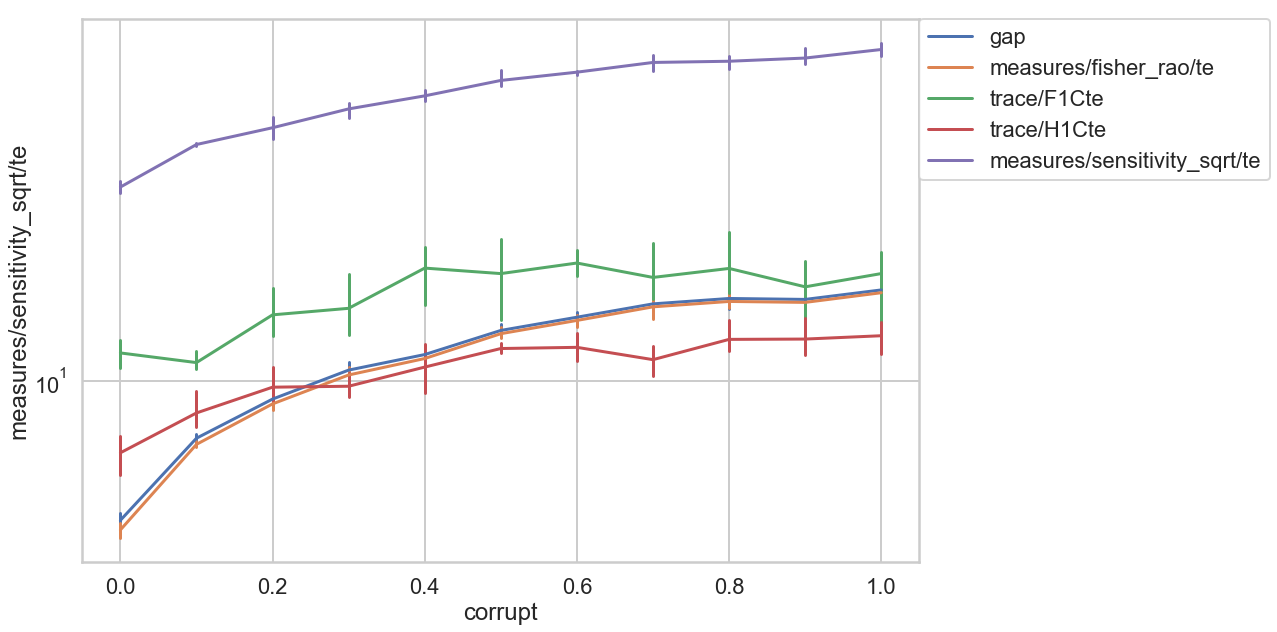

In [31]:
sns.lineplot(data=df.loc[filtr], x=xname, y='loss/abs_gap', label='gap', err_style="bars")
for k in df.keys():
    if (('1C' in k) or ('sqrt' in k) or ('fisher' in k)) and ('te' in k):
        sns.lineplot(data=df.loc[filtr], x=xname, y=k, label=k, err_style="bars")
# sns.lineplot(data=df.loc[filtr], x='hidden_size', y='ratio/trace_C_o_Hte', label='ratio', err_style="bars")

plt.yscale('log')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)

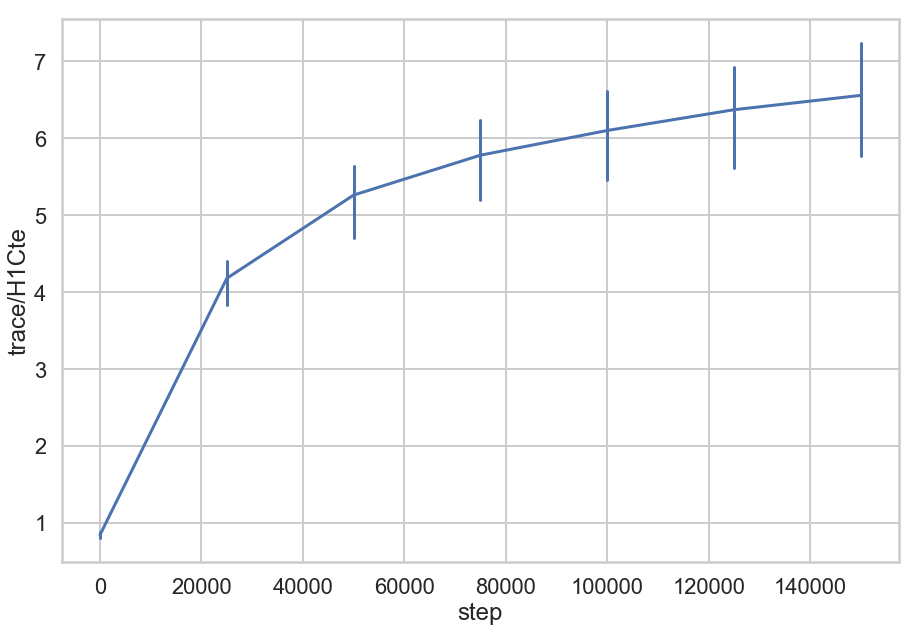

In [32]:
sns.lineplot(data=df.loc[(df['dataset'] == 'svhn') & (df['corrupt'] == 0)], y='trace/H1Cte', x='step', 
             err_style="bars")

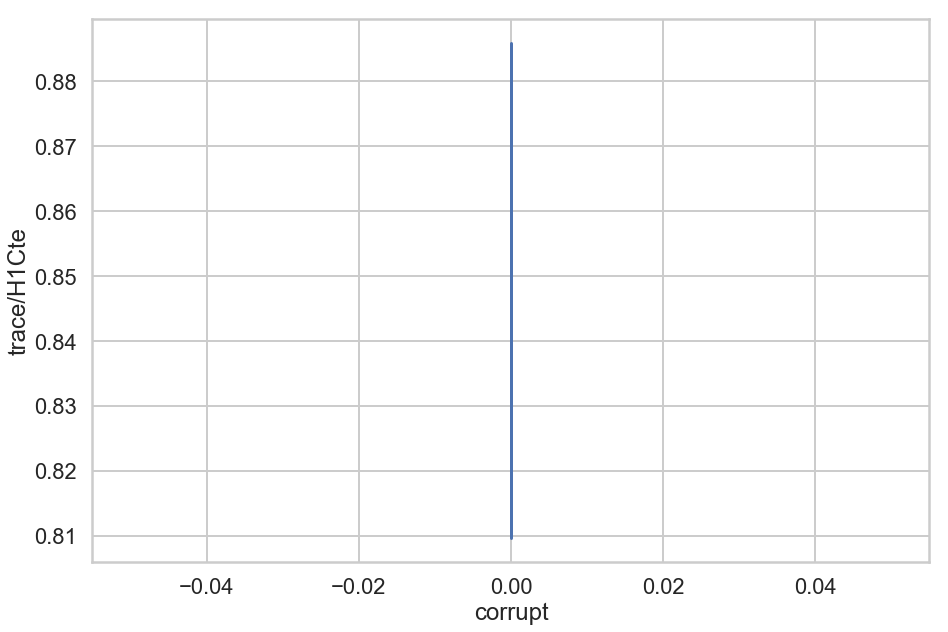

In [33]:
sns.lineplot(data=df.loc[(df['dataset'] == 'svhn') & (df['corrupt'] == 0) & (df['step'] == 0)], y='trace/H1Cte', x=xname, 
             err_style="bars")

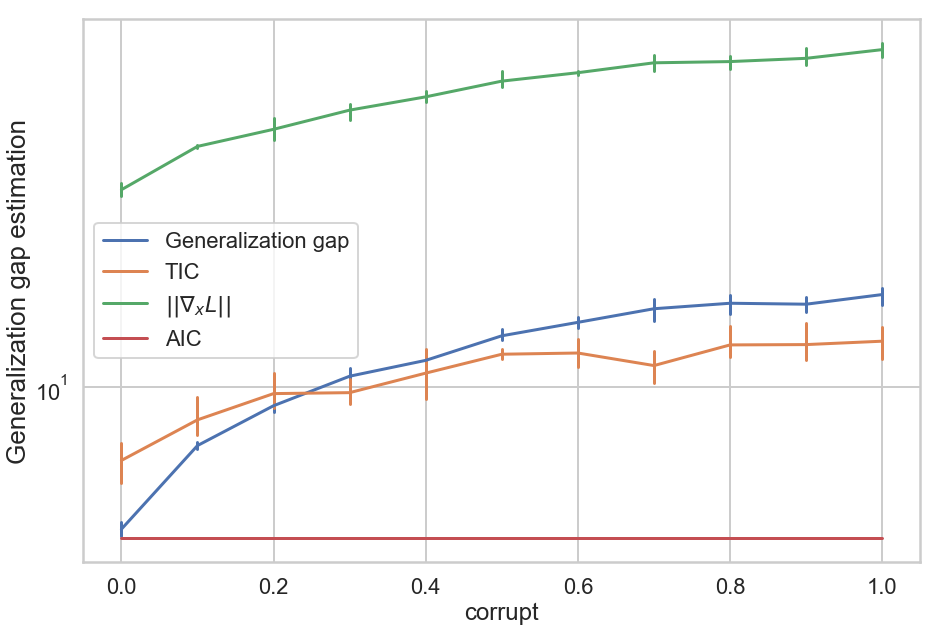

In [34]:
sns.set(style="whitegrid", rc={"lines.linewidth": 1.5})
sns.set_context("poster")

fig = plt.figure()
activation = 'relu'
filtr_act = (df['activation'] == activation)

sns.lineplot(data=df.loc[filtr & filtr_act], x=xname, y='loss/gap', label=f'Generalization gap', 
             err_style="bars")


ax = sns.lineplot(data=df.loc[filtr], y='trace/H1Cte', x=xname, label=f'TIC', err_style='bars')


sns.lineplot(data=df.loc[filtr & filtr_act], x=xname, y='measures/sensitivity_sqrt/te', label=fr'$||\nabla_x L||$', 
             err_style="bars")

# sns.lineplot(data=df.loc[filtr & filtr_act], x=xname, y='loss/tr', label=f'loss_tr', 
#              err_style="bars")
# sns.lineplot(data=df.loc[filtr & filtr_act], x='hidden_size', y='loss/te', label=f'loss_te_{activation}', 
#              err_style="bars")


sns.lineplot(data=df.loc[filtr], y='measures/aic', x=xname, label=f'AIC', err_style='bars')

# plt.xlabel('Hidden layer size', fontsize=26)
plt.ylabel('Generalization gap estimation', fontsize=26)
plt.yscale('log')
# fig.savefig('gap_hlayer.png', bbox_inches='tight')

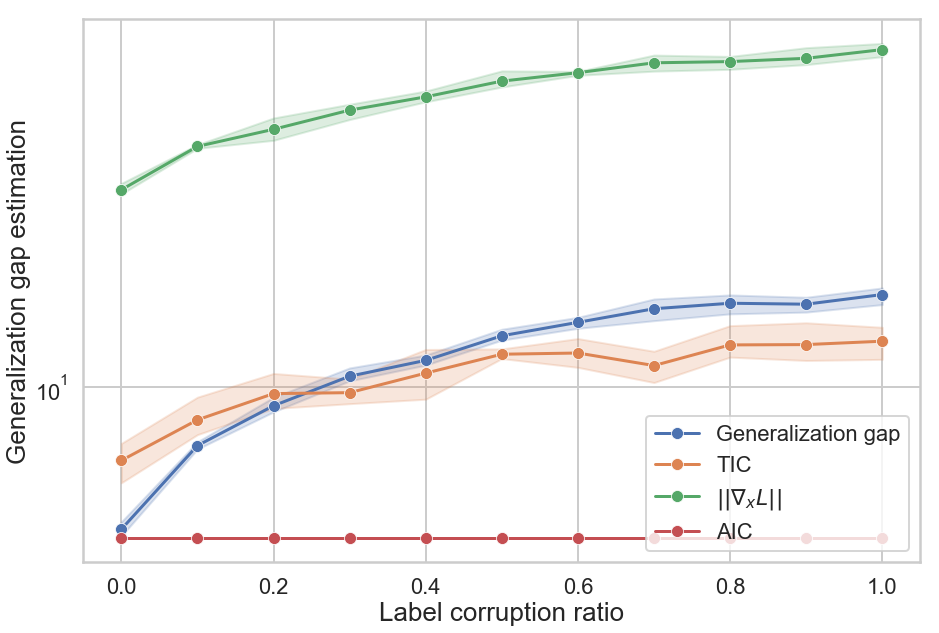

In [35]:
sns.set(style="whitegrid", rc={"lines.linewidth": 4})
sns.set_context("poster")

err_style_kwargs = 'band'
marker_kwargs = 'o'

fig = plt.figure()
activation = 'relu'
filtr_act = (df['activation'] == activation)

sns.lineplot(data=df.loc[filtr & filtr_act], x=xname, y='loss/gap', label=f'Generalization gap', 
             err_style=err_style_kwargs, marker=marker_kwargs)


ax = sns.lineplot(data=df.loc[filtr], y='trace/H1Cte', x=xname, label=f'TIC', err_style=err_style_kwargs, marker=marker_kwargs)


sns.lineplot(data=df.loc[filtr & filtr_act], x=xname, y='measures/sensitivity_sqrt/te', label=fr'$||\nabla_x L||$', 
             err_style=err_style_kwargs, marker=marker_kwargs)

# sns.lineplot(data=df.loc[filtr & filtr_act], x=xname, y='loss/tr', label=f'loss_tr', 
#              err_style="bars")
# sns.lineplot(data=df.loc[filtr & filtr_act], x='hidden_size', y='loss/te', label=f'loss_te_{activation}', 
#              err_style="bars")


sns.lineplot(data=df.loc[filtr], y='measures/aic', x=xname, label=f'AIC', err_style=err_style_kwargs, marker=marker_kwargs)

plt.legend(loc='lower right') 
if xname == 'corrupt':
    plt.xlabel('Label corruption ratio', fontsize=26)
else:
    plt.xlabel('Hidden layer size', fontsize=26)
    
plt.ylabel('Generalization gap estimation', fontsize=26)
plt.yscale('log')
# plt.ylim([1e-0, 1e2])
fig.savefig(f'gap_{xname}.png', bbox_inches='tight')

In [36]:
df.loc[filtr]['dataset']

6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
6    svhn
Name: dataset, dtype: object

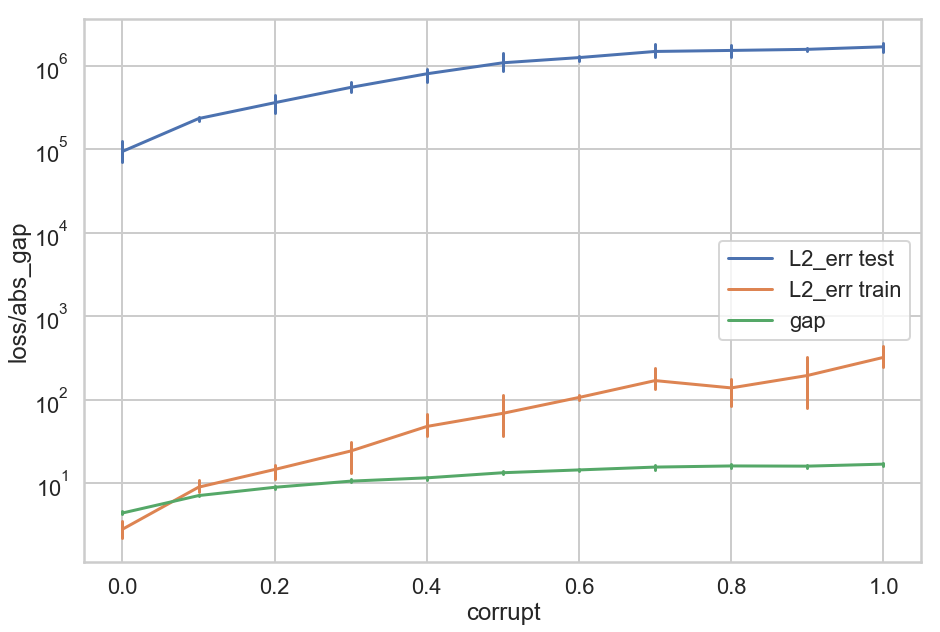

In [37]:
sns.lineplot(data=df.loc[filtr], x=xname, y='unsim_L2/Cte_Hte', label='L2_err test', err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='unsim_L2/Ctr_Htr', label='L2_err train', err_style="bars")
sns.lineplot(data=df.loc[filtr], x=xname, y='loss/abs_gap', label='gap', err_style="bars")
plt.yscale('log')

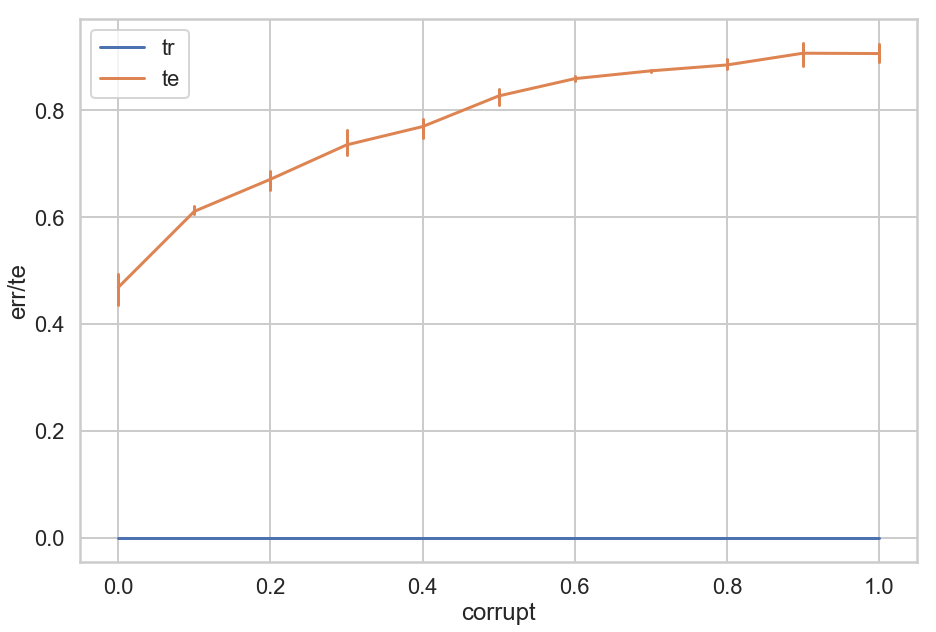

In [38]:
# filtr = (df['step']==time)
sns.lineplot(data=df.loc[df['step'] == 150000], y='err/tr', x=xname, label=f'tr', err_style='bars')
sns.lineplot(data=df.loc[df['step'] == 150000], y='err/te', x=xname, label=f'te', err_style='bars')

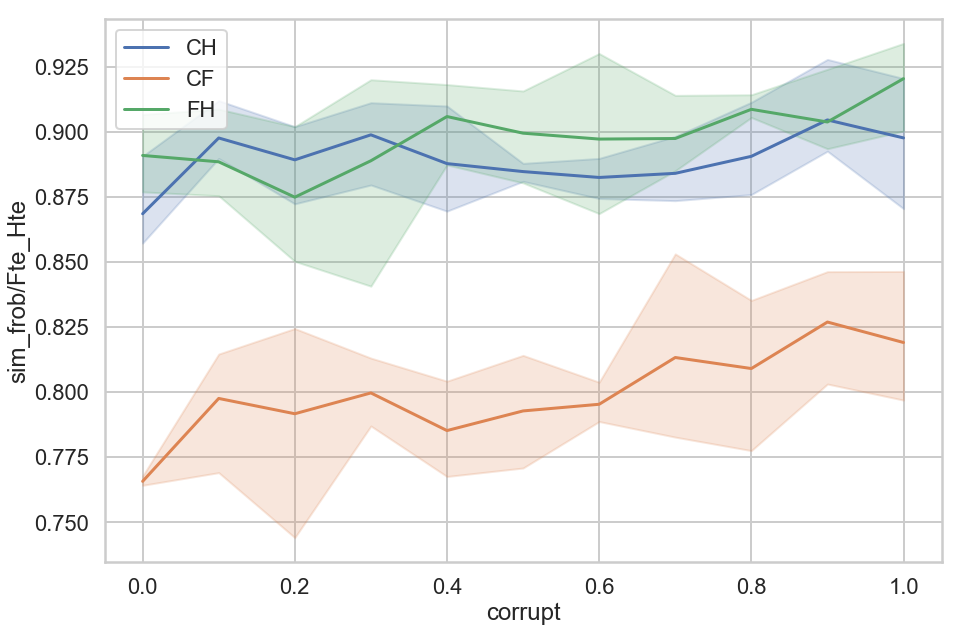

In [39]:

sns.set(style="whitegrid", rc={"lines.linewidth": 1.5})
sns.set_context("poster")

fig = plt.figure()
sns.lineplot(data=df.loc[filtr], x=xname, y='sim_frob/Cte_Hte', label='CH')
sns.lineplot(data=df.loc[filtr], x=xname, y='sim_frob/Cte_Fte', label='CF')
sns.lineplot(data=df.loc[filtr], x=xname, y='sim_frob/Fte_Hte', label='FH')
# sns.lineplot(data=df.loc[filtr], x=xname, y='loss/abs_gap', label='gap', err_style="bars")
# plt.yscale('log')

In [40]:
df['eps_rel/Cte_Hte'] = df['unsim_L2/Cte_Hte']/df['trace/HHte']
df['eps_rel/Cte_Fte'] = df['unsim_L2/Cte_Fte']/df['trace/FFte']
df['eps_rel/Fte_Hte'] = df['unsim_L2/Fte_Hte']/df['trace/HHte']

df['alpha/Cte_Hte'] = df['sim_frob/Cte_Hte']*np.sqrt(df['trace/HHte']/df['trace/CCte'])
df['alpha/Cte_Fte'] = df['sim_frob/Cte_Fte']*np.sqrt(df['trace/Fte']/df['trace/CCte'])
df['alpha/Fte_Hte'] = df['sim_frob/Fte_Hte']*np.sqrt(df['trace/HHte']/df['trace/FFte'])

df['eps_rel_alpha/Cte_Hte'] = np.sqrt(1-df['sim_frob/Cte_Hte']**2)
df['eps_rel_alpha/Cte_Fte'] = np.sqrt(1-df['sim_frob/Cte_Fte']**2)
df['eps_rel_alpha/Fte_Hte'] = np.sqrt(1-df['sim_frob/Fte_Hte']**2)

Text(0, 0.5, 'Cosine similarity')

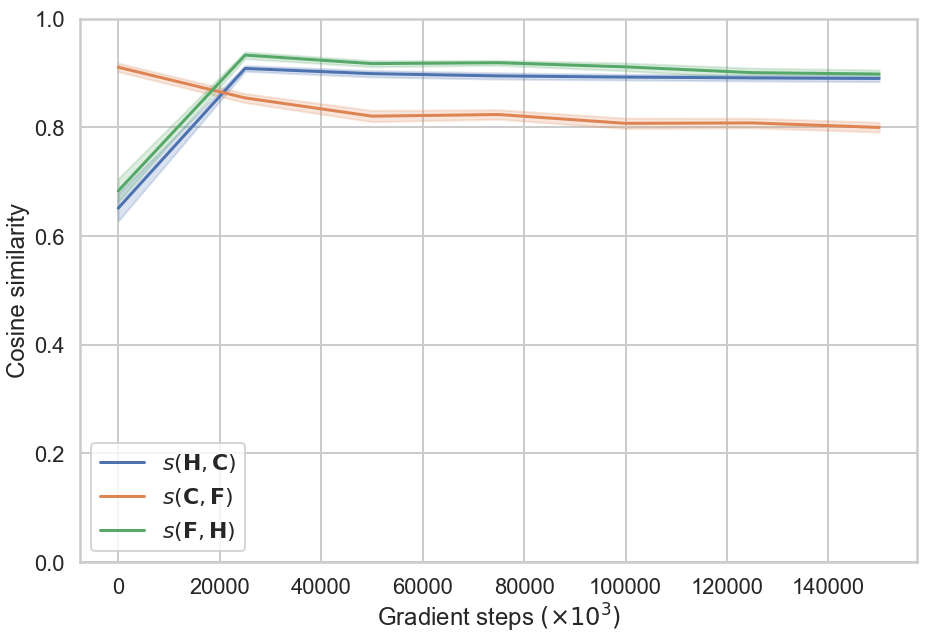

In [41]:

sns.set(style="whitegrid", rc={"lines.linewidth": 1.5})
sns.set_context("poster")

fig = plt.figure()
sns.lineplot(data=df, x='step', y='sim_frob/Cte_Hte', label=r'$s(\mathbf{H}, \mathbf{C})$')
sns.lineplot(data=df, x='step', y='sim_frob/Cte_Fte', label=r'$s(\mathbf{C}, \mathbf{F})$')
sns.lineplot(data=df, x='step', y='sim_frob/Fte_Hte', label=r'$s(\mathbf{F}, \mathbf{H})$')
plt.xlabel(r'Gradient steps $(\times 10^3)$')

# plt.yscale('log')
plt.ylim([0, 1])
plt.ylabel(r'Cosine similarity')
# fig.savefig('cossimHFC.png', bbox_inches='tight')

Text(0, 0.5, '$\\epsilon_{rel}(\\alpha^\\star)$')

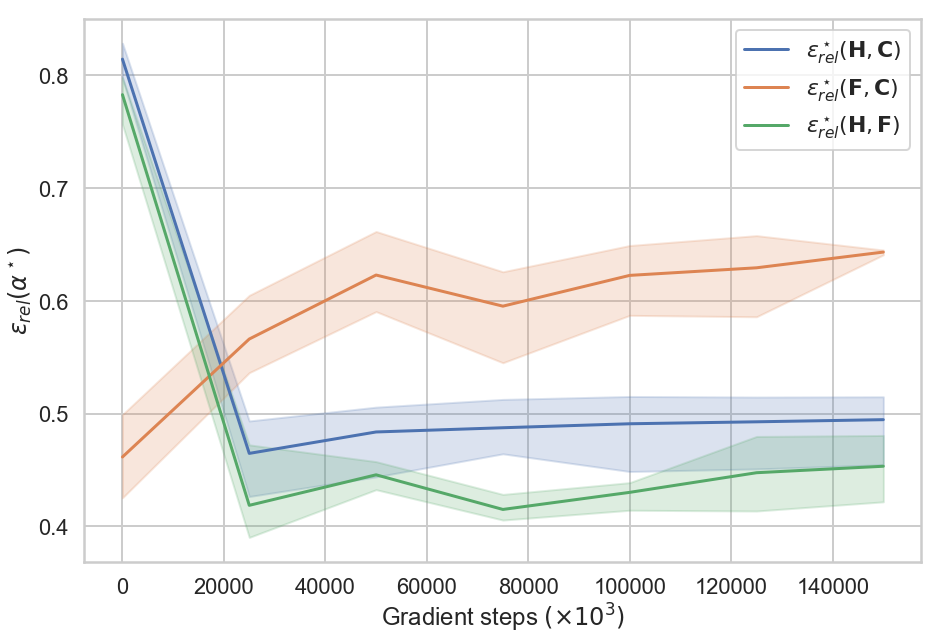

In [42]:
fig = plt.figure()
sns.lineplot(data=df.loc[df['corrupt'] == 0], x='step', y='eps_rel_alpha/Cte_Hte', label=r'$\epsilon_{rel}^\star(\mathbf{H}, \mathbf{C})$')
sns.lineplot(data=df.loc[df['corrupt'] == 0], x='step', y='eps_rel_alpha/Cte_Fte', label=r'$\epsilon_{rel}^\star(\mathbf{F}, \mathbf{C})$')
sns.lineplot(data=df.loc[df['corrupt'] == 0], x='step', y='eps_rel_alpha/Fte_Hte', label=r'$\epsilon_{rel}^\star(\mathbf{H}, \mathbf{F})$')
# plt.yscale('log')
plt.xlabel(r'Gradient steps $(\times 10^3)$')

# plt.yscale('log')
plt.ylabel(r'$\epsilon_{rel}(\alpha^\star)$')
# fig.savefig('rel_err_alpha_HFC.png', bbox_inches='tight')

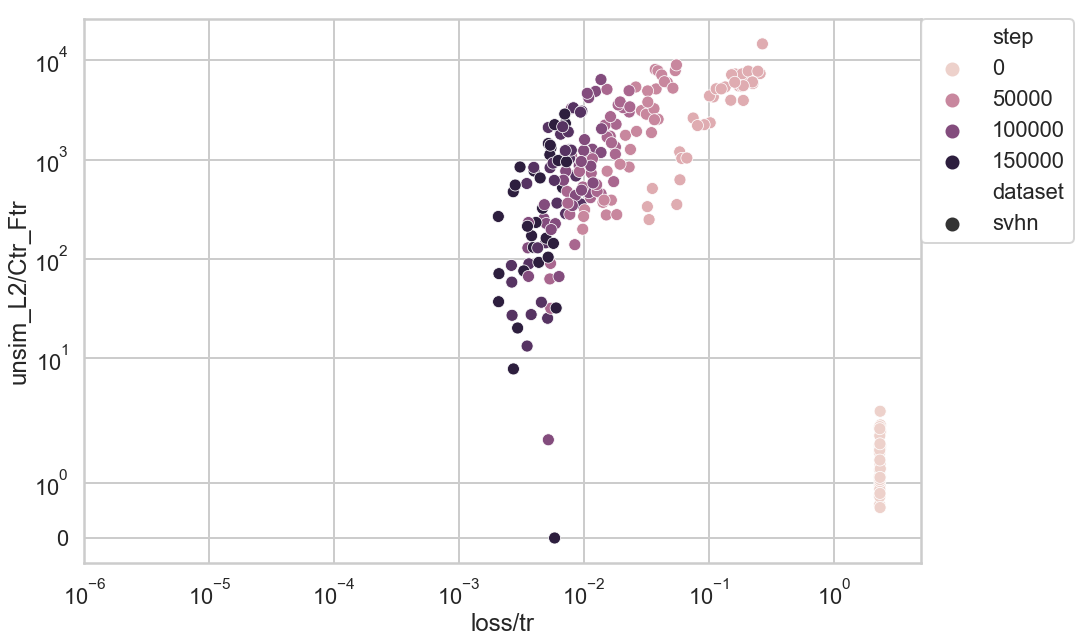

In [43]:
ax = sns.scatterplot(data=df, x='loss/tr', y='unsim_L2/Ctr_Ftr', hue='step', style='dataset')

plt.yscale('symlog')
plt.xscale('log')
plt.xlim([1e-6, 5])
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)

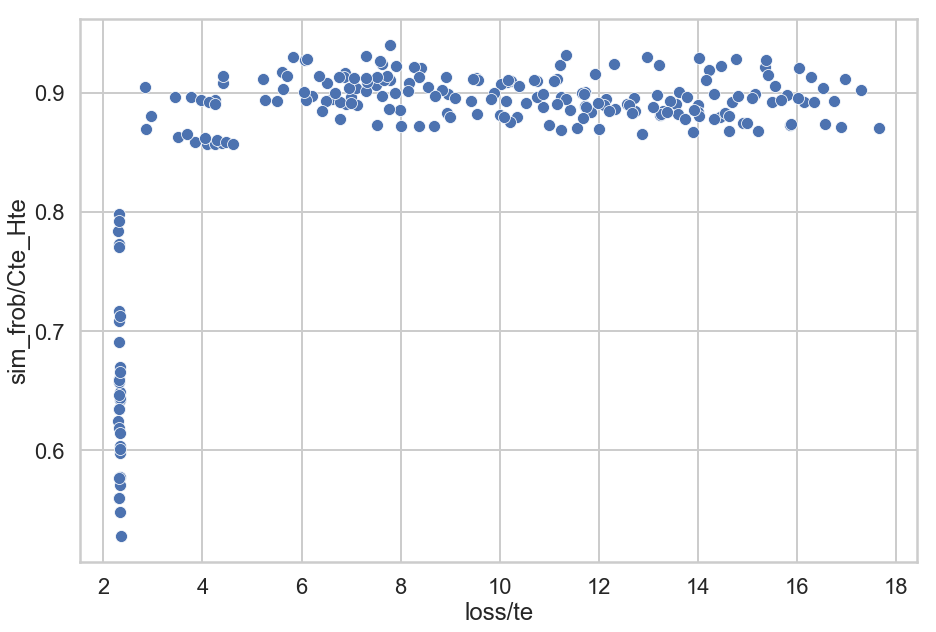

In [44]:
sns.scatterplot(data=df, x='loss/te', y='sim_frob/Cte_Hte')

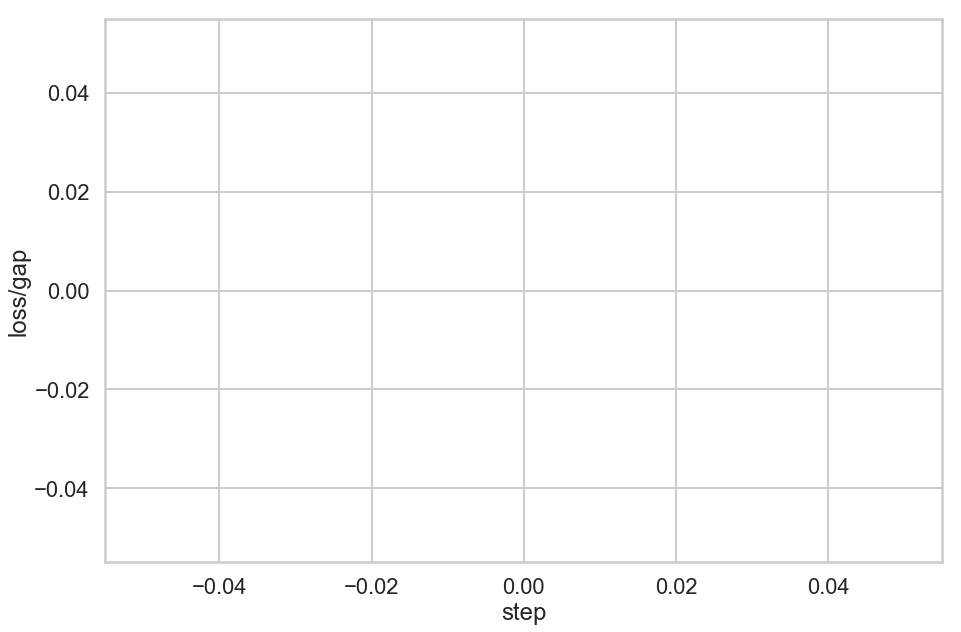

In [45]:
my_df = df.loc[(df['dataset_size']>=50000) & (df['dataset'] == 'cifar10') & (df['model'] == 'cnn_bn') & (df['batch_size']==64) & (df['lr']==0.001)]
sns.lineplot(data=my_df, x='step', y='loss/tr', label='tr')
sns.lineplot(data=my_df, x='step', y='loss/te', label='te')
sns.lineplot(data=my_df, x='step', y='loss/gap', label='gap')

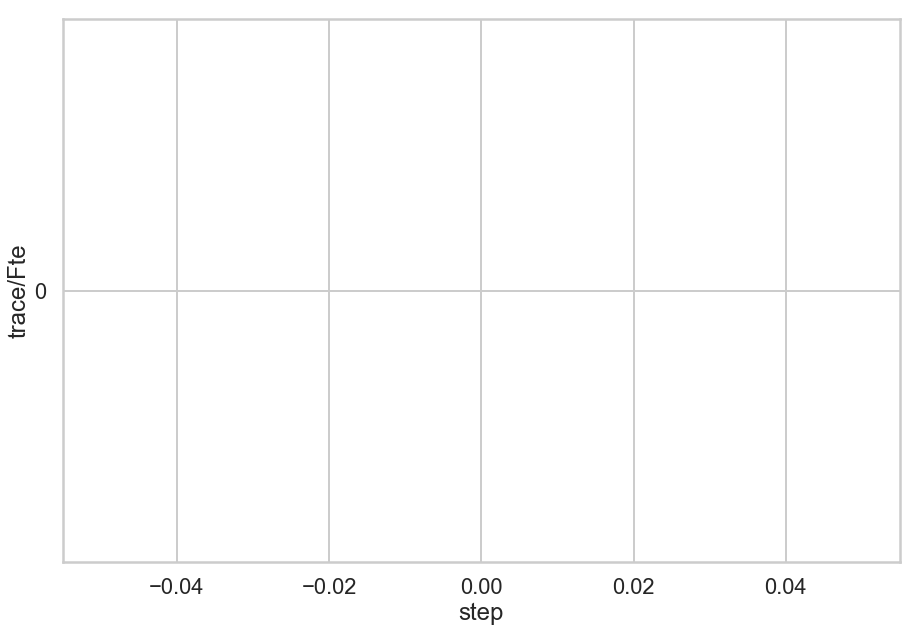

In [46]:
my_df = df.loc[(df['dataset_size']>=50000) & (df['dataset'] == 'svhn') & (df['model'] == 'cnn') & (df['batch_size']==64) & (df['lr']==0.001)]
sns.lineplot(data=my_df, x='step', y='trace/Htr', label='Htr')
sns.lineplot(data=my_df, x='step', y='trace/Hte', label='Hte')
sns.lineplot(data=my_df, x='step', y='trace/Ctr', label='Ctr')
sns.lineplot(data=my_df, x='step', y='trace/Cte', label='Cte')
# sns.lineplot(data=my_df, x='step', y='loss/tr', label='tr')
sns.lineplot(data=my_df, x='step', y='trace/Ftr', label='Ftr')
sns.lineplot(data=my_df, x='step', y='trace/Fte', label='Fte')
# sns.lineplot(data=my_df, x='step', y='trace/Gtr', label='Gtr')
# sns.lineplot(data=my_df, x='step', y='trace/Gte', label='Gte')
# sns.lineplot(data=my_df, x='step', y='loss/te', label='te')
# sns.lineplot(data=my_df, x='step', y='loss/gap', label='gap')
plt.yscale('symlog')

In [47]:
df.loc[(df['dataset_size']!=50000) & (df['dataset'] != 'mnist')]['sim_frob/Ctr_Ftr']

0    0.911686
1    0.912861
2    0.706449
3    0.497854
4    0.263993
5    0.146213
6    0.166591
0    0.913868
1    0.840714
2    0.660563
3    0.415532
4    0.347452
5    0.332991
6    0.801188
0    0.844418
1    0.618953
2    0.374596
3    0.351801
4    0.288311
5    0.047285
6    0.304290
0    0.940970
1    0.881506
2    0.630046
3    0.704977
4    0.395182
5    0.359321
6    0.472824
0    0.905822
1    0.677536
       ...   
5    0.214506
6    0.106287
0    0.897313
1    0.489648
2    0.436634
3    0.426619
4    0.169589
5    0.186601
6    0.251895
0    0.904058
1    0.893705
2    0.685067
3    0.611015
4    0.349983
5    0.347066
6    0.332653
0    0.942291
1    0.862342
2    0.514545
3    0.530499
4    0.197703
5    0.360398
6    0.229875
0    0.907970
1    0.829746
2    0.863625
3    0.581090
4    0.701569
5    0.552872
6    0.324324
Name: sim_frob/Ctr_Ftr, Length: 231, dtype: float64

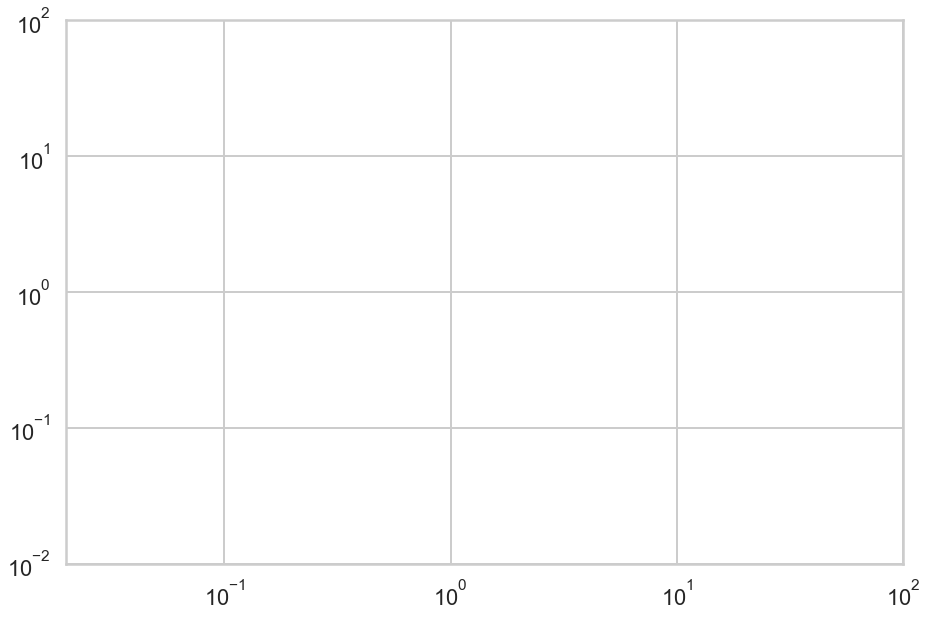

In [48]:
xlab = 'trace/H1Cte'
# xlab = 'sensitivity/te'
# ax = plt.axes(xscale='symlog', yscale='symlog')
# ax.grid('on');
ax = sns.scatterplot(data=df.loc[(df['step']>700000) & (df['model'] != 'logreg')], x=xlab, y='loss/abs_gap', hue='dataset', style='model')

plt.xlim([2e-2, 100])
plt.ylim([1e-2, 100])
plt.yscale('log')
plt.xscale('log')

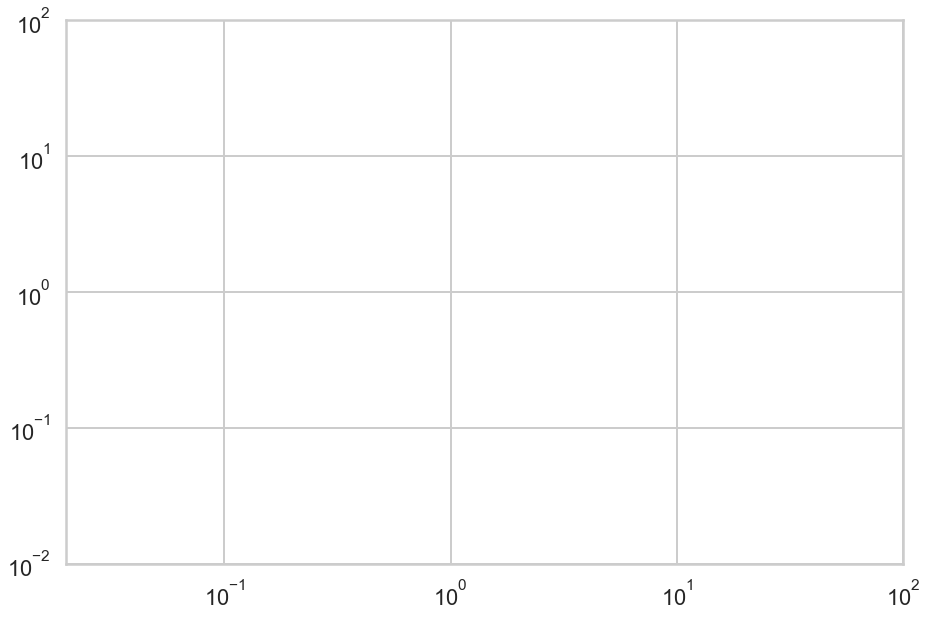

In [49]:
xlab = 'trace/F1Cte'
# xlab = 'sensitivity/te'
# ax = plt.axes(xscale='symlog', yscale='symlog')
# ax.grid('on');
ax = sns.scatterplot(data=df.loc[(df['step']>700000) & (df['model'] != 'logreg')], x=xlab, y='loss/abs_gap', hue='dataset', style='model')

plt.xlim([2e-2, 100])
plt.ylim([1e-2, 100])
plt.yscale('log')
plt.xscale('log')

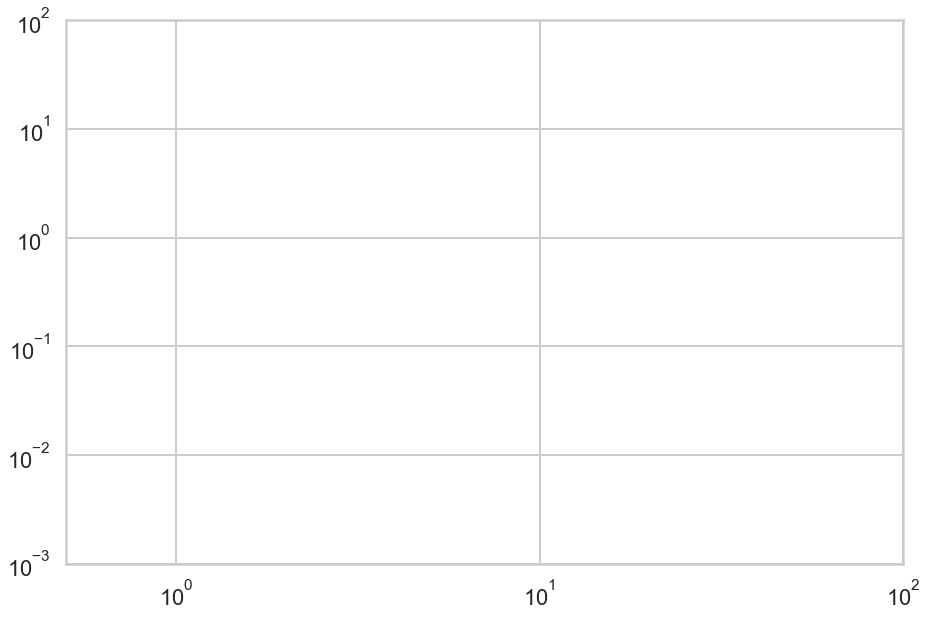

In [50]:
xlab = 'ratio/trace_C_o_Hte'
# xlab = 'sensitivity/te'
# ax = plt.axes(xscale='symlog', yscale='symlog')
# ax.grid('on');
ax = sns.scatterplot(data=df.loc[(df['step']>=750000)], x=xlab, y='loss/abs_gap', hue='dataset', style='model')

plt.xlim([5e-1, 100])
plt.ylim([1e-3, 100])
plt.yscale('log')
plt.xscale('log')

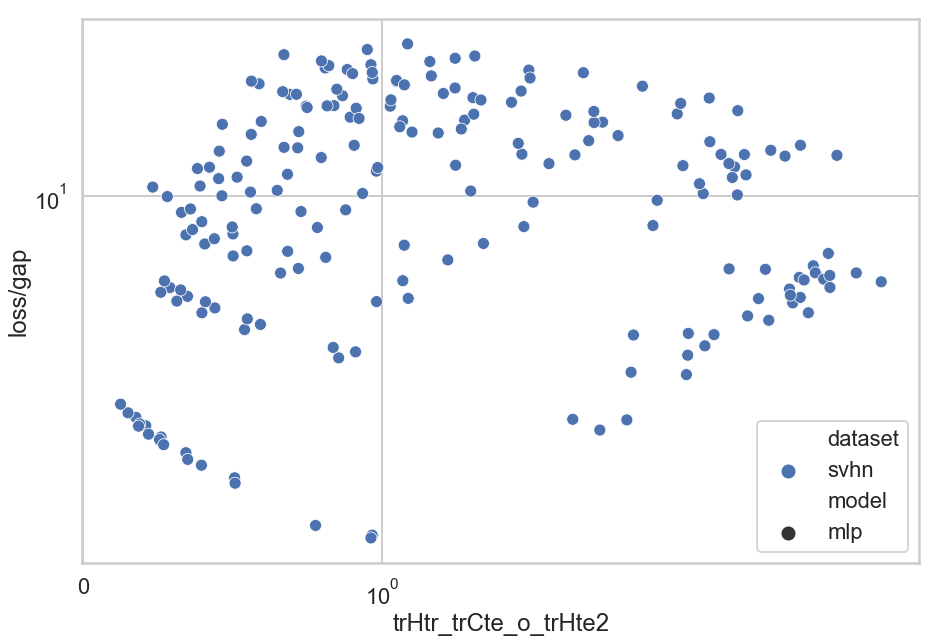

In [51]:
df['trHtr_trCte_o_trHte2'] = df['trace/Htr']*df['trace/Cte']/df['trace/Hte']**2

ax = sns.scatterplot(data=df.loc[(df['step']>=500)], x='trHtr_trCte_o_trHte2', y='loss/gap', hue='dataset', style='model')

plt.yscale('symlog')
plt.xscale('symlog')

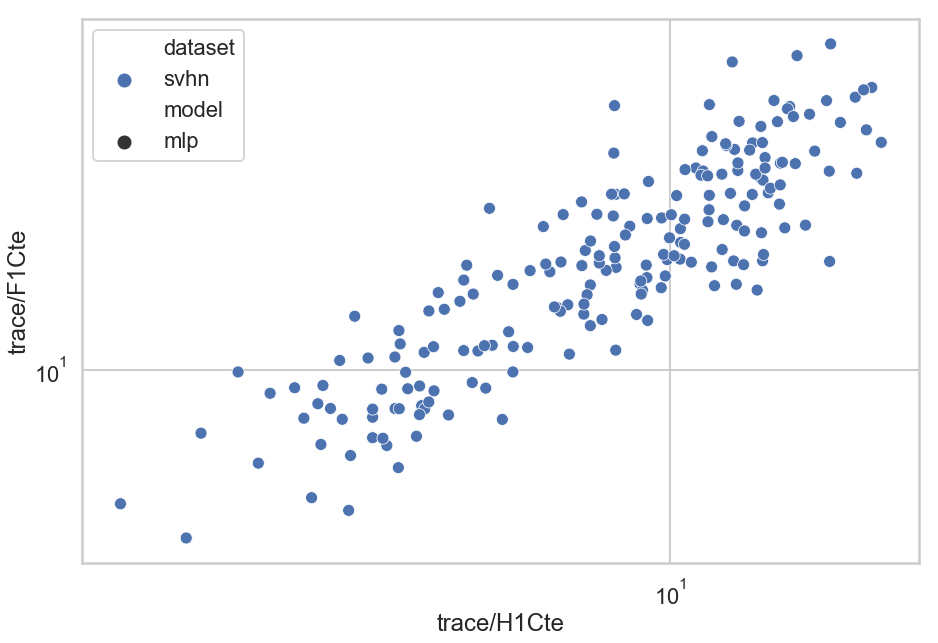

In [52]:

ax = sns.scatterplot(data=df.loc[(df['step']>=500)], x='trace/H1Cte', y='trace/F1Cte', hue='dataset', style='model')

plt.yscale('symlog')
plt.xscale('symlog')

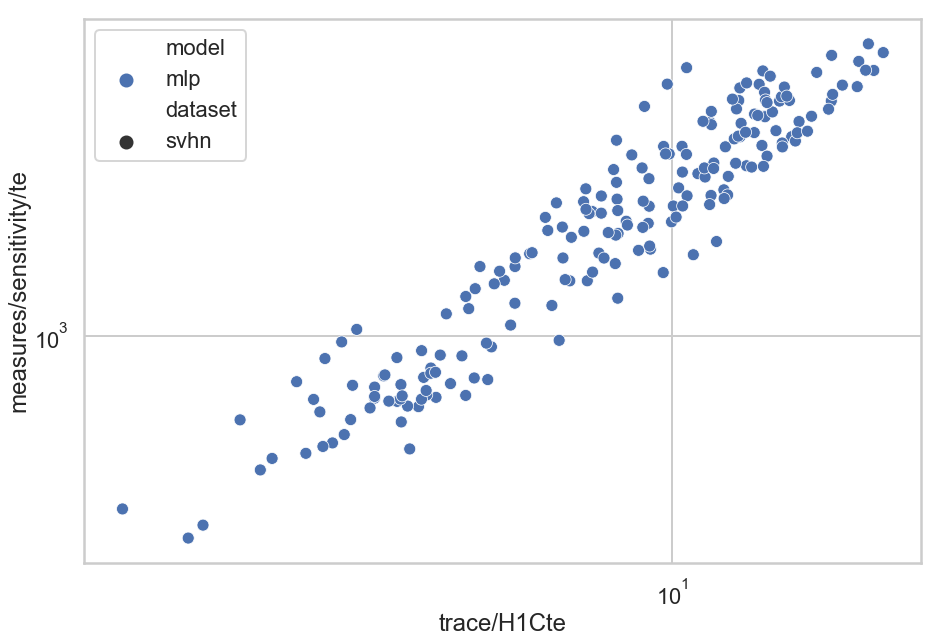

In [53]:
sns.scatterplot(data=df.loc[(df['step']>=500)], y='measures/sensitivity/te', x='trace/H1Cte', hue='model', style='dataset')
plt.yscale('symlog')
plt.xscale('symlog')
# plt.plot(np.arange(50), np.arange(50))

In [54]:
xlab = 'fisher_rao/tr'
# xlab = 'sensitivity/te'
# ax = plt.axes(xscale='symlog', yscale='symlog')
# ax.grid('on');
ax = sns.scatterplot(data=df.loc[(df['step']>=750000)], x=xlab, y='loss/abs_gap', hue='dataset', style='model')

# plt.xlim([5e-1, 100])
# plt.ylim([1e-3, 100])
plt.yscale('symlog')
plt.xscale('symlog')

ValueError: Could not interpret input 'fisher_rao/tr'

In [ ]:
sns.scatterplot(data=df.loc[(df['step']>=500)], x='ratio/trace_C_o_Hte', y='sensitivity/te', hue='dataset', style='dataset')
plt.yscale('symlog')
plt.xscale('symlog')
# plt.plot(np.arange(50), np.arange(50))

In [ ]:
sns.scatterplot(data=df.loc[(df['step']>=500)], x='ratio/trace_C_o_Hte', y='unsim_frob/Cte_Hte', hue='model', style='dataset')
plt.yscale('log')
plt.xscale('log')
# plt.plot(np.arange(50), np.arange(50))

In [ ]:
[e for e in df.keys() if 'ratio' in e ]

In [ ]:
ax = sns.scatterplot(data=df.loc[(df['step']>=100000)], x='trace/F1Cte', y='loss/abs_gap', hue='dataset', style='model')

plt.xlim([2e-2, 100])
plt.ylim([1e-3, 100])
plt.yscale('log')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
plt.plot(np.arange(50), np.arange(50))

In [ ]:
df['ratio/trace/Cte_o_Fte'] = df['trace/Cte']/df['trace/Fte']
ax = sns.scatterplot(data=df.loc[(df['step']>=500)], x='ratio/trace/Cte_o_Fte', y='loss/abs_gap', hue='dataset', style='model')

# plt.yscale('log')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# plt.xscale('log')
# plt.plot(np.arange(50), np.arange(50))

In [ ]:
df['ndim'] = df['trace/Cte']/(df['trace/Hte']*df['trace/H1Cte'])
# plt.hist(df[['ndim']])

In [ ]:
ax = sns.scatterplot(data=df.loc[(df['step'] == 550000) & (df['dataset'] == 'svhn')], x='ndim', y='loss/gap', hue='dataset_size', style='model')

plt.yscale('symlog')
plt.xscale('symlog')

In [ ]:
sns.jointplot(x='ndim', y='loss/abs_gap', data=df.loc[(df['step'] == 550000) & (df['dataset'] == 'mnist')])

In [ ]:
sns.jointplot(x='ndim', y='loss/abs_gap', data=df.loc[(df['step'] == 550000) & (df['dataset'] == 'cifar10')])

In [ ]:
ax = sns.scatterplot(data=df.loc[(df['step']>=500)], x='ratio/trace/Cte_o_Fte', y='trace/F1Cte', hue='dataset', style='model')

plt.yscale('log')
plt.xscale('log')
plt.plot(np.arange(50), np.arange(50))

In [ ]:
sns.scatterplot(data=df[(df['dataset'] == 'mnist') & (df['ratio_lr_bs'] == 0.01/64)], x='dataset_size', y='loss/gap', hue='model', style='dataset')
plt.yscale('symlog')
# plt.xscale('symlog')
# plt.plot(np.arange(50), np.arange(50))

In [ ]:
sns.scatterplot(data=df[(df['dataset'] == 'mnist') & (df['ratio_lr_bs'] == 0.01/64)], x='dataset_size', y='ratio/trace_C_o_Hte', hue='model', style='dataset')
plt.yscale('symlog')
plt.legend(loc=None)
# df[(df['dataset'] == 'mnist')

In [ ]:
sns.scatterplot(data=df[(df['dataset'] == 'mnist') & (df['ratio_lr_bs'] == 0.01/64)], x='dataset_size', y='trace/Hte', hue='model', style='dataset')
plt.yscale('symlog')

In [ ]:
sns.scatterplot(data=df[(df['dataset'] == 'mnist') & (df['ratio_lr_bs'] == 0.01/64)], x='dataset_size', y='trace/Cte', hue='model', style='dataset')
plt.yscale('symlog')

In [ ]:
sns.scatterplot(data=df, x='ratio/trace_C_o_Htr', y='loss/gap', hue='model', style='dataset')
plt.yscale('symlog')
plt.xscale('symlog')

In [ ]:
sns.scatterplot(data=df, x='unsim_frob/Ctr_Htr', y='loss/gap', style='model', hue='dataset')
plt.yscale('symlog')
plt.xscale('symlog')

In [ ]:
sns.swarmplot(data=df.loc[(df['model'] == 'cnn_bn') & (df['dataset'] == 'cifar10')], y='trace/HCtr', x='step', hue='dataset_size')
# plt.ylim([0, 6])
# plt.xlim([0,6])
plt.yscale('log')
plt.xscale('symlog')

In [ ]:
# sns.scatterplot(data=df.loc[df['dataset'] == 'mnist'], y='loss/te', x='trace/H1Cte', hue='model')
df_mnist = df.loc[df['dataset'] == 'mnist' ]
sns.regplot(data=df_mnist.loc[df_mnist['trace/H1Cte'] > 0], y='loss/te', x='trace/H1Cte', lowess=True, scatter_kws={"s": 10})
sns.regplot(data=df_mnist.loc[df_mnist['trace/H1Cte'] > 0], y='loss/tr', x='trace/H1Cte', lowess=True, scatter_kws={"s": 10})
# plt.xlim([-.02, .45

In [ ]:
# sns.scatterplot(data=df, y='loss/te', x='ratio/trace_C_o_Hte', hue='model')
# plt.ylim([.05, .45])
labx = 'loss/tr'
sns.regplot(data=df, y='trace/Ftr', x=labx, label='F', scatter_kws={"s": 10})
# sns.regplot(data=df, y='trace/Htr', x=labx, label='H', scatter_kws={"s": 10})
sns.regplot(data=df, y='trace/Ctr', x=labx, label='C', scatter_kws={"s": 10})
plt.legend()
plt.yscale('symlog')

In [ ]:
df['log_sim_frob/Cte_Hte'] = np.log(1e-10+df['sim_frob/Cte_Hte'])
sns.scatterplot(data=df.loc[df['dataset'] != 'cifar1'] , x='ratio/trace_C_o_Hte', y='loss/gap', hue='model', style='dataset')
plt.xscale('symlog')
plt.yscale('symlog')

In [ ]:
sns.scatterplot(data=df , x='ratio/trace_HC_o_HHte', y='loss/gap', hue='dataset', style='dataset')
# plt.xscale('log')
plt.plot(np.arange(50), np.arange(50))

In [ ]:
sns.scatterplot(data=df , x='trace/H1Cte', y='loss/gap', hue='dataset', style='dataset')
# plt.xscale('log')
# plt.xscale('symlog')
# plt.yscale('symlog')
plt.plot(np.arange(10), np.arange(10))

In [ ]:
sns.scatterplot(data=df.loc[df['dataset'] != 'mist'] , x='sensitivity/te', y='loss/gap', hue='dataset', style='dataset')
# plt.xscale('symlog')
# plt.yscale('symlog')

In [ ]:
sns.scatterplot(data=df.loc[df['dataset'] != 'cifar1'] , x='ratio/trace_C_o_Hte', y='loss/gap', hue='model', style='dataset')
# plt.xscale('symlog')
# plt.yscale('symlog')
plt.plot(np.arange(50), np.arange(50))

In [ ]:
# df2 = df.loc[']
# print(pd.DataFrame(df2))
sns.scatterplot(data=df, y='sim_frob/Ctr_Ftr', x='loss/tr', style='model', hue='model')
plt.xscale('symlog')

In [ ]:
sns.scatterplot(data=df, y='unsim_frob/Ctr_Htr', x='loss/gap', style='dataset', hue='dataset')
plt.yscale('symlog')
plt.xscale('symlog')

In [ ]:
sns.scatterplot(data=df, y='unsim_frob/Ftr_Htr', x='loss/gap', style='model', hue='step')
plt.xscale('symlog')
plt.yscale('log')

In [ ]:
sns.scatterplot(data=df.loc[df['loss/tr']<0.001], y='unsim_L2/Ctr_Ftr', x='loss/tr', style='dataset', hue='model')
plt.yscale('symlog')
plt.xscale('symlog')

In [ ]:
sns.scatterplot(data=df, x='trace/H1Cte', y='trace/H1Ctr', hue='dataset', style='model')
plt.yscale('log')
plt.xscale('log')
plt.xlim([1e-4, 10])
plt.ylim([1e-6, 10])
plt.plot(np.arange(10), np.arange(10))

In [ ]:
sns.scatterplot(data=df.loc[df['step']>=545000], x='trace/Htr', y='loss/gap', hue='model')
plt.xscale('symlog')
plt.yscale('symlog')

In [ ]:

#     #sns.scatterplot(np.array(metric[metric_namex]['value'], np.array(metric[metric_namex]['value'])
# #     metricsx.append(
# #     metricsy.append(
# # dfx = metricsx[0]
# # for dfx_ in metricsx[1:]:
# #     dfx = dfx.append(dfx_)
# # dfy = metricsy[0]
# # for dfy_ in metricsy[1:]:
# #     dfy = dfy.append(dfy_)
# # ipdb.set_trace()
# #if metric_name is not 'ess_0':
#     #metric_name += env_name

# for metric_name in metric_names:
#     fig = plt.figure()
#     for i in range(len(experiments)):
#         ipdb.set_trace()
#         param = api.get_params(experiments[i]["experiment_key"])
#         metric = api.get_metrics(experiments[i]["experiment_key"])
#         try:
#             sns.lineplot(x="step", y="value", data=metric[metric_name])
#         except:
#             pass
#     fig.savefig(f"./plots/{metric_name.replace('/', '_')}.png")
#     plt.close('all')
#     print(f'Done {metric_name}')


# # df = metrics[0]
# # for df_ in metrics[1:]:
# #     df = df.append(df_)
# #
# # df['category'] = df[param_names].apply(lambda x: '-'.join(x), axis=1).astype(str)
# # for group in param_names:
# #     os.makedirs("plots/" + plot_name + '/' + env_name + '/' + group, exist_ok=True)
# #
# #     for subgroup in set(df[group]):
# #         df_sub = df.loc[df[group] == subgroup]
# #         df_sub = df_sub.reset_index()
# #         sns.lineplot(x="step", y="value", hue="category", data=df_sub)
# #         plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# #         plt.savefig('plots/' + plot_name + '/' + env_name + '/' + group + '/' + subgroup + '.pdf', bbox_inches='tight')
# #         plt.close()


In [ ]:
df.keys()

In [ ]:
df.loc[df['dataset'] == 'mnist']

In [ ]:
df['ratio/trace/Ctr_o_Ftr'] = df['trace/Ctr']/df['trace/Ftr']
df['ratio/trace/Cte_o_Fte'] = df['trace/Cte']/df['trace/Fte']
df['ratio/trace/C_o_Gte'] = df['trace/Cte']/df['trace/Gte']
df['ratio/trace/C_o_Gtr'] = df['trace/Ctr']/df['trace/Gtr']
df['ratio/trace/F_o_Gte'] = df['trace/Fte']/df['trace/Gte']
df['ratio/trace/F_o_Gtr'] = df['trace/Ftr']/df['trace/Gtr']

In [ ]:


sns.set(font_scale=1.5)
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
# matplotlib.style.use('ggplot')
# plt.style.use('seaborn-colorblind')
# plt.style.use('seaborn-ticks')

sns.set_style("whitegrid")
# sns.set_context('paper')
# sns.set_palette("colorblind")

font = {'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [ ]:
# fig = plt.figure()
fig, ax = plt.subplots()

sns.scatterplot(data=df.loc[df['step']==550000], x='trace/Htr', y='loss/gap', hue='model', style='dataset')

plt.xlabel(r'Tr($\bar{\mathbf{H}})$', fontsize=26)
plt.ylabel('Generalization gap', fontsize=26)
plt.xscale('symlog')
plt.yscale('symlog')
fig.savefig('gap_trhtr.png', bbox_inches='tight')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# plt.close()

In [ ]:
fig = plt.figure()

sns.scatterplot(data=df, x='trace/Hte', y='loss/gap', hue='dataset', style='model')

plt.xlabel(r'Tr(${\mathbf{H}})$', fontsize=26)
plt.ylabel('Generalization gap', fontsize=26)
plt.xscale('symlog')
plt.yscale('symlog')
fig.savefig('gap_trhte.png', bbox_inches='tight')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# plt.close()

In [ ]:
from scipy import stats
varx = np.array(df.loc[df['step'] == 550000]['trace/F1Cte'])
vary = np.array(df.loc[df['step'] == 550000]['loss/gap'])
mask = ~np.isnan(varx) & ~np.isnan(vary)
slope, intercept, r_value, p_value, std_err =  stats.linregress(varx[mask], vary[mask])

confidence_interval = 2.58*std_err

In [ ]:
type(df)

In [ ]:
# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

df['gap'] = np.log(np.abs(df['loss/gap']+1e-4))
df['tic'] = np.log(np.abs(df['trace/F1Cte']+1e-4))
model = ols("gap ~ tic", df).fit()
# Print the summary
print(model.summary())

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

intercept, slope = model._results.params

In [ ]:
# print(slope, intercept, r_value)
vec = np.arange(20)
plt.plot(vec, np.abs(vec*slope+intercept))
plt.scatter(varx, vary)
plt.xlim([1e-4, 100])
plt.ylim([1e-4, 100])
plt.xscale('log')
plt.yscale('log')

In [ ]:
df['ratio/trace/C_o_Fte'] = df['ratio/trace/Cte_o_Fte']
df['ratio/trace/C_o_Hte'] = df['ratio/trace/Cte_o_Hte']

df['ratio/trace/C_o_Ftr'] = df['ratio/trace/Ctr_o_Ftr']
df['ratio/trace/C_o_Htr'] = df['ratio/trace/Ctr_o_Htr']


In [ ]:
dataset = 'te'

for criterion in ['trace/H1C', 'trace/F1C', 'ratio/trace/C_o_H', 'ratio/trace/C_o_F']:
    criterion = criterion + dataset
    fig = plt.figure()

    # criterion = 'trace/H1Cte'
    # criterion = 'ratio/trace/Cte_o_Fte'

    sns.scatterplot(data=df.loc[df['step'] == 550000], x=criterion, y='loss/gap', hue='dataset', style='model', s=80)
    # sns.scatterplot(data=df, x='trace/H1Cte', y='loss/gap', kind='kde')
    # plt.plot(np.linspace(-.1, .6, 100), np.linspace(-.1, .6, 100), 'k--')

    # plt.xlabel(r'Tr($\mathbf{H}^{-1} \mathbf{C}$)', fontsize=26)
    plt.xlabel(criterion, fontsize=26)
    plt.ylabel('Generalization gap', fontsize=26)
    # plt.ylabel(r'$\mathcal{G}$', fontsize=26)
    # plt.xscale('symlog')
    # plt.yscale('symlog')
    plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
    # plt.xlim([-.3, 1.25])
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(np.arange(50), np.arange(50))

    fig_name = criterion.replace('/', '_').lower()
    print(fig_name)
    fig.savefig(f'plots/gap_{fig_name.lower()}.png', bbox_inches='tight')

    # plt.close()


In [ ]:
fig = plt.figure()

sns.scatterplot(data=df.loc[(df['step'] <= 500000) & (df['dataset']!='mnist')], x='trace/G1Cte', y='loss/gap', hue='model', style='dataset')
# sns.scatterplot(data=df, x='trace/H1Cte', y='loss/gap', kind='kde')
# plt.plot(np.linspace(-.1, .6, 100), np.linspace(-.1, .6, 100), 'k--')

plt.xlabel(r'Tr($\mathbf{G}^{-1} \mathbf{C}$)', fontsize=26)
plt.ylabel('Generalization gap', fontsize=26)
plt.xscale('symlog')
plt.yscale('symlog')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# plt.xlim([-.3, 1.25])
# plt.xscale('log')
# plt.yscale('log')
fig.savefig('gap_trg1cte.png', bbox_inches='tight')

# plt.close()


In [ ]:
fig = plt.figure()

sns.scatterplot(data=df.loc[df['model'] != 'loggreg'], x='ratio/trace/C_o_Gte', y='loss/gap', hue='dataset', style='model')
# sns.scatterplot(data=df, x='trace/H1Cte', y='loss/gap', kind='kde')
# plt.plot(np.linspace(-.1, .6, 100), np.linspace(-.1, .6, 100), 'k--')

plt.ylabel(r'Generalization gap', fontsize=26)
# plt.xlabel(r'Sensitivity', fontsize=24)
plt.xlabel(r'Tr($\mathbf{C}$)/Tr($\mathbf{H}$)', fontsize=26)

plt.xscale('symlog')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
plt.yscale('symlog')
# plt.xlim([-.3, 1.25])
# plt.xscale('log')
# plt.yscale('log')
fig.savefig('gap_trCtrH.png', bbox_inches='tight')
# plt.close()


In [ ]:
fig = plt.figure()

sns.scatterplot(data=df.loc[df['model'] != 'loggreg'], x='ratio/trace/Cte_o_Fte', y='loss/gap', hue='dataset', style='model')
# sns.scatterplot(data=df, x='trace/H1Cte', y='loss/gap', kind='kde')
# plt.plot(np.linspace(-.1, .6, 100), np.linspace(-.1, .6, 100), 'k--')

plt.ylabel(r'Generalization gap', fontsize=26)
# plt.xlabel(r'Sensitivity', fontsize=24)
plt.xlabel(r'Tr($\mathbf{C}$)/Tr($\mathbf{F}$)', fontsize=26)

plt.xscale('symlog')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
plt.yscale('symlog')
# plt.xlim([-.3, 1.25])
# plt.xscale('log')
# plt.yscale('log')
fig.savefig('gap_trCtrF.png', bbox_inches='tight')
# plt.close()


In [ ]:
fig = plt.figure()

sns.scatterplot(data=df.loc[df['step'] <= 500000], x='ratio/trace_HC_o_HHte', y='loss/gap', hue='dataset', style='model')
# sns.scatterplot(data=df, x='trace/H1Cte', y='loss/gap', kind='kde')
# plt.plot(np.linspace(-.1, .6, 100), np.linspace(-.1, .6, 100), 'k--')

plt.ylabel(r'Generalization gap', fontsize=26)
# plt.xlabel(r'Sensitivity', fontsize=24)
plt.xlabel(r'Tr($\mathbf{H C}$)/Tr($\mathbf{H H}$)', fontsize=26)

plt.xscale('symlog')
plt.yscale('symlog')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# plt.xlim([-.3, 1.25])
# plt.xscale('log')
# plt.yscale('log')
fig.savefig('gap_trHCtrHH.png', bbox_inches='tight')
# plt.close()


In [ ]:
fig = plt.figure()

sns.scatterplot(data=df.loc[df['model'] != 'loggreg'], x='sensitivity/te', y='loss/gap', hue='dataset', style='model')
# sns.scatterplot(data=df, x='trace/H1Cte', y='loss/gap', kind='kde')
# plt.plot(np.linspace(-.1, .6, 100), np.linspace(-.1, .6, 100), 'k--')

plt.ylabel(r'Generalization gap', fontsize=26)
plt.xlabel(r'$||\nabla_{{x}} L||^2$', fontsize=26)
# plt.xlabel(r'Tr($\mathbf{C}$)/Tr($\mathbf{H}$)', fontsize=24)

plt.xscale('symlog')
plt.yscale('symlog')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# plt.xlim([-.3, 1.25])
# plt.xscale('log')
# plt.yscale('log')
fig.savefig('gap_sensitivity.png', bbox_inches='tight')
# plt.close()

In [ ]:
fig = plt.figure()

sns.scatterplot(data=df.loc[df['model'] != 'loggreg'], x='sensitivity/tr', y='loss/gap', hue='step', style='model')
# sns.scatterplot(data=df, x='trace/H1Cte', y='loss/gap', kind='kde')
# plt.plot(np.linspace(-.1, .6, 100), np.linspace(-.1, .6, 100), 'k--')

plt.ylabel(r'Generalization gap', fontsize=26)
plt.xlabel(r'$||\nabla_{{x}} \mathcal{L} ||^2$', fontsize=26)
# plt.xlabel(r'Tr($\mathbf{C}$)/Tr($\mathbf{H}$)', fontsize=24)

plt.xscale('symlog')
plt.yscale('symlog')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# plt.xlim([-.3, 1.25])
# plt.xscale('log')
# plt.yscale('log')
fig.savefig('gap_sensitivity_tr.png', bbox_inches='tight')
# plt.close()

In [ ]:
fig = plt.figure()
my_df = df.loc[(df['dataset_size']==50000) & (df['dataset']!= 'mnist') & (df['model']!= 'logreg')]
# my_df = df.loc[df['loss/gap']<0.2]
sns.scatterplot(data=my_df, x='trace/H1Ctr', y='loss/gap', hue='model', style='dataset')
plt.xlabel(r'Takeuchi Information Criterion', fontsize=24)
# plt.xlim([-0.025, .125])
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
plt.ylabel('Generalization gap', fontsize=24)
# plt.xscale('symlog')
# plt.yscale('symlog')
fig.savefig('gap_trh1ctr.pdf', bbox_inches='tight')

In [ ]:
fig = plt.figure()
my_df = df.loc[(df['dataset_size']==50000) & (df['dataset']!= 'mnist') & (df['model']!= 'logreg')]
# my_df = df.loc[df['loss/gap']<0.2]
sns.scatterplot(data=my_df, x='trace/F1Ctr', y='loss/gap', hue='model', style='dataset')
plt.xlabel(r'Takeuchi-Fisher Information Criterion', fontsize=24)
# plt.xlim([-0.025, .125])
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
plt.ylabel('Generalization gap', fontsize=24)
# plt.xscale('symlog')
# plt.yscale('symlog')
fig.savefig('gap_trf1ctr.pdf', bbox_inches='tight')

In [ ]:
fig = plt.figure()
dset = 'mnist'
df_mnist = df.loc[df['dataset'] == dset]
sns.regplot(data=df_mnist.loc[df_mnist['trace/H1Cte'] > 0], y='loss/te', x='trace/H1Cte', lowess=True, scatter_kws={"s": 10}, label='Test')
sns.regplot(data=df_mnist.loc[df_mnist['trace/H1Cte'] > 0], y='loss/tr', x='trace/H1Cte', lowess=True, scatter_kws={"s": 10}, label='Train')
plt.xlabel(r'Takeuchi Information Criterion', fontsize=24)
plt.ylabel('Generalization gap', fontsize=24)
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# plt.xscale('log')
plt.xscale('symlog')
plt.yscale('symlog')
plt.legend(loc='best')
fig.savefig(f'overfitting_NN_{dset}.pdf', bbox_inches='tight')

In [ ]:
fig = plt.figure()
df_mnist = df.loc[(df['dataset'] == 'svhn') & (df['dataset_size'] > 10000)]
sns.scatterplot(data=df, x='loss/gap', y='sim_frob/Cte_Ctr', hue='dataset', style='model')
# plt.xlabel(r'hessian', fontsize=26)
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# plt.ylabel('Generalization gap', fontsize=24)
plt.legend()
plt.xscale('symlog')
# plt.yscale('symlog')
# plt.xlim([-.005, 0.04])
# fig.savefig('overiftting_NN_mnist.pdf', bbox_inches='tight')

In [ ]:
# f, ax = plt.subplots(figsize=(12, 12))
# cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
# sns.kdeplot(data=df, x='trace/H1Cte', y='loss/gap')

In [ ]:
df['ngap'] = df['loss/gap']*df['dataset_size']

In [ ]:
df['ntrhicte'] = df['trace/H1Cte']*df['dataset_size']
df['trhicte'] = df['trace/H1Cte']
df['trhicten'] = df['trace/H1Cte']/df['dataset_size']
df['nntrhicte'] = df['trace/H1Cte']*df['dataset_size']*df['dataset_size']

In [ ]:
axes = sns.scatterplot(data=df.loc[df['model'] == 'big_mlp'], x='trace/F1Ctr', y='loss/gap', hue='dataset', style='model')
# plt.plot(np.arange(5000), np.arange(5000), 'k--')
# plt.xlim([-1000, 15000])
# plt.ylim([-1000, 15000])

In [ ]:
X = np.array(df['trace/H1Cte'])[1000:1300]
y = np.array(df['loss/gap'])[1000:1300]
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
kernel = 1 * RBF(length_scale=1) + 1.0 * WhiteKernel()

In [ ]:
df['cloud'] = df['trace/H1Cte']*df['lr']/(2*df['batch_size'])

In [ ]:
fig = plt.figure()
my_df = df.loc[(df['dataset_size'] == 50000) ]
sns.scatterplot(data=my_df, x='trace/H1Ctr', y='loss/gap', hue='model', style='dataset')
# plt.xlabel(r'Takeuchi Information Criterion', fontsize=24)
# plt.xlim([-1e-6, 6e-5])
# plt.xscale('log')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# plt.xscale('symlog')
# plt.yscale('symlog')
# plt.ylabel('Generalization gap', fontsize=24)
# fig.savefig('gap_trh1ctr.pdf', bbox_inches='tight')

In [ ]:
fig = plt.figure()
my_df = df.loc[(df['dataset_size'] == 50000) ]
sns.scatterplot(data=my_df, x='trace/F1Ctr', y='loss/gap', hue='model', style='dataset')
# plt.xlabel(r'Takeuchi Information Criterion', fontsize=24)
# plt.xlim([-1e-6, 6e-5])
# plt.xscale('log')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# plt.xscale('symlog')
# plt.yscale('symlog')
# plt.ylabel('Generalization gap', fontsize=24)
# fig.savefig('gap_trh1ctr.pdf', bbox_inches='tight')

In [ ]:
my_df = df.loc[(df['dataset'] == 'cifar10') & (df['model'] == 'cnn_bn') & (df['ratio_lr_bs'] == 0.001/64) & (df['dataset_size'] == 60000)]

In [ ]:
sns.lineplot(data=my_df, y='loss/gap', x='step', label='gap')
sns.lineplot(data=my_df, y='loss/tr', x='step')
sns.lineplot(data=my_df, y='loss/te', x='step')

In [ ]:
sns.lineplot(data=my_df, y='trace/HCtr', x='step', label='HC')
# sns.lineplot(data=my_df, y='trace/Ctr', x='step', label='C')
# sns.lineplot(data=my_df, y='trace/Htr', x='step', label='H')
# sns.lineplot(data=my_df, y='loss/te', x='step', label='Ltr')
plt.yscale('log')
# sns.lineplot(data=my_df, y='loss/tetrace/HCtr', x='step')

In [ ]:
# sns.lineplot(data=my_df, y='trace/HCtr', x='step', label='HC')
sns.lineplot(data=my_df, y='trace/H1Ctr', x='step', label='H1Ctr')
sns.lineplot(data=my_df, y='trace/H1Cte', x='step', label='H1Cte')
sns.lineplot(data=my_df, y='trace/G1Ctr', x='step', label='G1Ctr')
sns.lineplot(data=my_df, y='trace/G1Cte', x='step', label='G1Cte')
sns.lineplot(data=my_df, y='loss/gap', x='step', label='gap')
# sns.lineplot(data=my_df, y='ratio/trace_C_o_Htr', x='step', label='trC/trH')
# sns.lineplot(data=my_df, y='trace/Htr', x='step', label='H')
# sns.lineplot(data=my_df, y='loss/te', x='step', label='Ltr')
plt.yscale('log')

In [ ]:
my_df = df.loc[(df['dataset'] == 'svhn')  & (df['model'] == 'cnn') & (df['ratio_lr_bs']==0.01/64)] # & (df['dataset_size'] == 50000)
xlab = 'trace/H1Ctr'
# xlab = 'ratio/trace_C_o_Hte'
ylab = 'loss/gap'
# ylab = 'trace/Hte'

slope, intercept, r_value, p_value, std_err = stats.linregress(my_df[xlab],my_df[ylab])
ax = sns.scatterplot(data=my_df, x=xlab, y=ylab, hue='dataset_size')
plt.xscale('symlog')
plt.yscale('symlog')


# plt.plot(np.array(my_df[xlab]), np.array(my_df[xlab])*slope+intercept, label="y={0:.2f}x+{1:.2f}".format(slope,intercept), color='k')
ax.legend()
plt.title(f'R2 = {r_value**2}')

In [ ]:
my_df = df.loc[(df['dataset'] == 'svhn')  & (df['model'] == 'cnn') & (df['dataset_size']==10000)] # & (df['dataset_size'] == 50000)
xlab = 'trace/H1Ctr'
# xlab = 'ratio/trace_C_o_Hte'
ylab = 'loss/gap'
# ylab = 'trace/Hte'

slope, intercept, r_value, p_value, std_err = stats.linregress(my_df[xlab],my_df[ylab])
ax = sns.scatterplot(data=my_df, x=xlab, y=ylab, hue='ratio_lr_bs')
plt.xscale('symlog')
plt.yscale('symlog')


# plt.plot(np.array(my_df[xlab]), np.array(my_df[xlab])*slope+intercept, label="y={0:.2f}x+{1:.2f}".format(slope,intercept), color='k')
ax.legend()
plt.title(f'R2 = {r_value**2}')

In [ ]:
my_df = df.loc[(df['dataset'] == 'svhn')  & (df['model'] == 'cnn') & (df['dataset_size']==10000)] # & (df['dataset_size'] == 50000)
xlab = 'trace/H1Ctr'
# xlab = 'ratio/trace_C_o_Hte'
ylab = 'loss/gap'
# ylab = 'trace/Hte'

slope, intercept, r_value, p_value, std_err = stats.linregress(my_df[xlab],my_df[ylab])
ax = sns.scatterplot(data=my_df, x=xlab, y=ylab, hue='ratio_lr_bs')
plt.xscale('symlog')
plt.yscale('symlog')


# plt.plot(np.array(my_df[xlab]), np.array(my_df[xlab])*slope+intercept, label="y={0:.2f}x+{1:.2f}".format(slope,intercept), color='k')
ax.legend()
plt.title(f'R2 = {r_value**2}')

In [ ]:
fig = plt.figure()
# xlab = 'ratio/trace_C_o_Htr'
# xlab = 'trace/HCte'
# xlab = 'ratio/trace_HC_o_HHte'
# xlab = 'ratio/norm_C_o_Hte'
# xlab = 'ratio/trace_HH_o_HCte'
# df['logtrace/Htr'] = np.log10(df['trace/Htr'])
# df['logtrace/Ctr'] = np.log10(df['trace/Ctr'])
df['ratio/trace/Ctr_o_Cte'] = df['trace/Ctr']/df['trace/Cte']
df['ratio/trace/Cte_o_Ctr'] = df['trace/Cte']/df['trace/Ctr']
df['ratio/trace/Htr_o_Hte'] = df['trace/Htr']/df['trace/Hte']
df['ratio/trace/Hte_o_Htr'] = df['trace/Hte']/df['trace/Htr']
# xlab = 'trace/H1Ctr'
xlab = 'ratio/trace/Ctr_o_Cte'
# xlab = 'sensitivity/te'
sns.scatterplot(data=df.loc[df['model'] != 'loggreg'], x=xlab, y='loss/gap', hue='dataset', style='model')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# sns.scatterplot(data=df, x='trace/H1Cte', y='loss/gap', kind='kde')
# plt.plot(np.linspace(-.1, .6, 100), np.linspace(-.1, .6, 100), 'k--')
plt.axvline(x=1)
# plt.ylabel(r'Generalization gap', fontsize=26)
# plt.xlabel(r'Sensitivity', fontsize=24)
# plt.xlabel(r'Tr($\mathbf{H C}$)/Tr($\mathbf{H H}$)', fontsize=26)

plt.xscale('symlog')
plt.yscale('symlog')
# plt.xlim([-.1, 1.25])
# plt.xscale('log')
# plt.yscale('log')
# fig.savefig('gap_trHCtrHH.png', bbox_inches='tight')
# plt.close()


In [ ]:
fig = plt.figure()
# xlab = 'ratio/trace_C_o_Htr'
# xlab = 'trace/HCte'
# xlab = 'ratio/trace_HC_o_HHte'
# xlab = 'ratio/norm_C_o_Hte'
# xlab = 'ratio/trace_HH_o_HCte'
# df['logtrace/Htr'] = np.log10(df['trace/Htr'])
# df['logtrace/Ctr'] = np.log10(df['trace/Ctr'])
# df['ratio/trace/Ctr_o_Cte'] = df['trace/Ctr']/df['trace/Cte']
# df['ratio/trace/Cte_o_Ctr'] = df['trace/Cte']/df['trace/Ctr']
# df['ratio/trace/Htr_o_Hte'] = df['trace/Htr']/df['trace/Hte']
# df['ratio/trace/Hte_o_Htr'] = df['trace/Hte']/df['trace/Htr']
# xlab = 'trace/H1Ctr'
xlab = 'ratio/trace/Htr_o_Hte'
# xlab = 'sensitivity/te'
sns.scatterplot(data=df.loc[df['model'] != 'loggreg'], x=xlab, y='loss/gap', hue='dataset', style='model')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# sns.scatterplot(data=df, x='trace/H1Cte', y='loss/gap', kind='kde')
# plt.plot(np.linspace(-.1, .6, 100), np.linspace(-.1, .6, 100), 'k--')
plt.axvline(x=1)
# plt.ylabel(r'Generalization gap', fontsize=26)
# plt.xlabel(r'Sensitivity', fontsize=24)
# plt.xlabel(r'Tr($\mathbf{H C}$)/Tr($\mathbf{H H}$)', fontsize=26)

# plt.xscale('symlog')
plt.yscale('symlog')
# plt.xlim([-.1, 1.25])
# plt.xscale('log')
# plt.yscale('log')
# fig.savefig('gap_trHCtrHH.png', bbox_inches='tight')
# plt.close()


In [ ]:
fig = plt.figure()
xlab = 'ratio/trace_C_o_Hte'
# xlab = 'trace/HCte'
# xlab = 'ratio/trace_HC_o_HHte'
# xlab = 'ratio/norm_C_o_Hte'
# xlab = 'ratio/trace_HH_o_HCte'
# df['logtrace/Htr'] = np.log10(df['trace/Htr'])
# df['logtrace/Ctr'] = np.log10(df['trace/Ctr'])
# df['ratio/trace/Ctr_o_Cte'] = df['trace/Ctr']/df['trace/Cte']
# df['ratio/trace/Cte_o_Ctr'] = df['trace/Cte']/df['trace/Ctr']
# df['ratio/trace/Htr_o_Hte'] = df['trace/Htr']/df['trace/Hte']
# df['ratio/trace/Hte_o_Htr'] = df['trace/Hte']/df['trace/Htr']
# xlab = 'trace/H1Ctr'
# xlab = 'ratio/trace/Ctr_o_Cte'
# xlab = 'sensitivity/tr'
sns.scatterplot(data=df.loc[df['model'] == 'cnn'], x=xlab, y='loss/gap', hue='dataset_size', style='model')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# sns.scatterplot(data=df, x='trace/H1Cte', y='loss/gap', kind='kde')
# plt.plot(np.linspace(-.1, .6, 100), np.linspace(-.1, .6, 100), 'k--')
plt.axvline(x=1)
# plt.ylabel(r'Generalization gap', fontsize=26)
# plt.xlabel(r'Sensitivity', fontsize=24)
# plt.xlabel(r'Tr($\mathbf{H C}$)/Tr($\mathbf{H H}$)', fontsize=26)

plt.xscale('symlog')
plt.yscale('symlog')
# plt.xlim([-.1, 1.25])
# plt.xscale('log')
# plt.yscale('log')
# fig.savefig('gap_trHCtrHH.png', bbox_inches='tight')
# plt.close()


In [ ]:
sns.scatterplot(data=df.loc[df['model'] != 'ctnn'], x='ratio/trace_C_o_Hte', y='ratio/trace_C_o_Htr', hue='dataset', style='model')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
plt.xscale('symlog')
plt.yscale('symlog')

In [ ]:
sns.scatterplot(data=df.loc[df['model'] == 'big_mlp'], x='step', y='trace/HCtr', hue='loss/gap', style='model')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# plt.xscale('symlog')
plt.yscale('symlog')

In [ ]:
fig = plt.figure()

# xlab = 'trace/HCte'
# xlab = 'ratio/trace_HC_o_HHte'
# xlab = 'ratio/norm_C_o_Hte'
# xlab = 'ratio/trace_HH_o_HCte'
# df['logtrace/Htr'] = np.log10(df['trace/Htr'])
# df['logtrace/Ctr'] = np.log10(df['trace/Ctr'])
# df['ratio/trace/Ctr_o_Cte'] = df['trace/Ctr']/df['trace/Cte']
df['ratio/trace/Ctr_o_Htr'] = df['trace/Ctr']/df['trace/Htr']
df['ratio/trace/Ctr_o_Ftr'] = df['trace/Ctr']/df['trace/Ftr']
df['ratio/trace/Cte_o_Fte'] = df['trace/Cte']/df['trace/Fte']
df['ratio/trace/Cte_o_Hte'] = df['trace/Cte']/df['trace/Hte']

my_df = df#.loc[(df['dataset_size'] == 50000) & (df['dataset']!='mnist')]
xlab = 'ratio/trace/Cte_o_Hte'
# df['ratio/trace/Hte_o_Htr'] = df['trace/Hte']/df['trace/Htr']
# xlab = 'trace/H1Ctr'
# xlab = 'ratio/trace/Ctr_o_Cte'
# xlab = 'sensitivity/tr'
sns.scatterplot(data=my_df, x=xlab, y='loss/gap', hue='dataset', style='model')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
# sns.scatterplot(data=df, x='trace/H1Cte', y='loss/gap', kind='kde')
# plt.plot(np.linspace(-.1, .6, 100), np.linspace(-.1, .6, 100), 'k--')
plt.axvline(x=1)
# plt.ylabel(r'Generalization gap', fontsize=26)
# plt.xlabel(r'Sensitivity', fontsize=24)
# plt.xlabel(r'Tr($\mathbf{H C}$)/Tr($\mathbf{H H}$)', fontsize=26)

plt.xscale('symlog')
plt.yscale('symlog')
# plt.xlim([-.1, 1.25])
# plt.xscale('log')
# plt.yscale('log')
# fig.savefig('gap_trHCtrHH.png', bbox_inches='tight')
# plt.close()


In [ ]:
sns.scatterplot(data=df, x='trace/Hte', y='trace/Gte', hue='dataset', style='model')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
plt.xscale('symlog')
plt.yscale('symlog')

In [ ]:
sns.scatterplot(data=df, x='trace/Htr', y='trace/Gtr', hue='dataset', style='model')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
plt.xscale('symlog')
plt.yscale('symlog')

In [ ]:
df['unsim_frob/Ctr_Htr'] = 1-df['sim_frob/Ctr_Htr']
df['unsim_frob/Ftr_Htr'] = 1-df['sim_frob/Ftr_Htr']
df['unsim_frob/Fte_Hte'] = 1-df['sim_frob/Fte_Hte']
df['unsim_frob/Cte_Hte'] = 1-df['sim_frob/Cte_Hte']
df['unsim_frob/Ctr_Ftr'] = 1-df['sim_frob/Ctr_Ftr']
df['unsim_frob/Cte_Fte'] = 1-df['sim_frob/Cte_Fte']
df['unsim_frob/Cte_Hte'] = 1-df['sim_frob/Cte_Hte']
df['unsim_frob/Ctr_Gtr'] = 1-df['sim_frob/Ctr_Gtr']
df['unsim_frob/Cte_Gte'] = 1-df['sim_frob/Cte_Gte']

df['proxy/Ctr_Htr'] = df['sim_frob/Ctr_Htr']*df['trace/Ctr']/df['trace/Htr']
df['proxy/Cte_Hte'] = df['sim_frob/Cte_Hte']*df['trace/Cte']/df['trace/Hte']


In [ ]:
sns.scatterplot(data=df, x='proxy/Cte_Hte', y='loss/gap', hue='dataset', style='model')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
plt.xscale('symlog')
plt.yscale('symlog')

In [ ]:
sns.scatterplot(data=df, x='unsim_frob/Cte_Gte', y='loss/gap', hue='dataset', style='model')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
plt.xscale('symlog')
plt.yscale('symlog')

In [ ]:
df.keys()

In [ ]:
df['loss/log_gap'] = np.log10(np.abs(df['loss/gap'])+1e-2)
sns.scatterplot(data=df, x='trace/Cte', y='trace/Hte', hue='loss/log_gap', style='model')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
plt.xscale('symlog')
plt.yscale('symlog')

In [ ]:
sns.scatterplot(data=df.loc[df['model']=='cnn'], x='trace/Ctr', y='trace/Htr', hue='step', style='model')
plt.legend(bbox_to_anchor=(1., 1), loc=2, borderaxespad=0.)
plt.xscale('symlog')
plt.yscale('symlog')